In [94]:
from google.colab import files
import seaborn as sns
import io
import pandas as pd
import numpy as np
import statsmodels.api as sm
from collections import defaultdict
import matplotlib.pyplot as plt
from sklearn.metrics import root_mean_squared_error as rmse
from sklearn.preprocessing import MinMaxScaler
#from sklearn.metrics import mean_absolute_error as mae
#from sklearn.metrics import r2_score
from scipy import signal

In [22]:
def dataloader(data, na, nb, d):

    # Initialize empty arrays for lagged features
    y = data['y']
    u = data['u']
    X = pd.DataFrame()


    # Create lagged features for output ('a' parameters)
    for i in range(1,na+1):
        X['y-{}'.format(i)] = y.shift(i)
    # Create lagged features for input ('b' parameters)
    for i in range(0,nb):
        X['u-{}'.format(i + d)] = u.shift(i + d)


    #Only select data after a certain value
    X = X.iloc[max(na,nb+d):]
    # Set the target values
    y = y[max(na,nb+d):]

    X.reset_index(drop=True, inplace=True)
    y.reset_index(drop=True, inplace=True)
    return X, y

def r_2(y, y_hat):

  y_mean = np.mean(y)
  y_hat_mean = np.mean(y_hat)
  sst = np.sum((y - y_mean) ** 2)
  ssr = np.sum((y - y_hat_mean) ** 2)
  r_squared = 1 - (ssr / sst)

  #print("SSR:", ssr)
  #print("SST:", sst)
  #print("Mean of y:", y_mean)
  #print("Variance of y:", np.var(y))

  return r_squared

# 1º Practical assignment

In [4]:
uploaded = files.upload()

Saving MOB_Dataset1_A6_M12.csv to MOB_Dataset1_A6_M12.csv
Saving MOB_Dataset1_A6_M11.csv to MOB_Dataset1_A6_M11.csv
Saving MOB_Dataset1_A5_M9.csv to MOB_Dataset1_A5_M9.csv
Saving MOB_Dataset1_A5_M10.csv to MOB_Dataset1_A5_M10.csv
Saving MOB_Dataset1_A4_M8.csv to MOB_Dataset1_A4_M8.csv
Saving MOB_Dataset1_A4_M7.csv to MOB_Dataset1_A4_M7.csv
Saving MOB_Dataset1_A3_M6.csv to MOB_Dataset1_A3_M6.csv
Saving MOB_Dataset1_A3_M5.csv to MOB_Dataset1_A3_M5.csv
Saving MOB_Dataset1_A2_M4.csv to MOB_Dataset1_A2_M4.csv
Saving MOB_Dataset1_A2_M3.csv to MOB_Dataset1_A2_M3.csv
Saving MOB_Dataset1_A1_M2.csv to MOB_Dataset1_A1_M2.csv
Saving MOB_Dataset1_A1_M1.csv to MOB_Dataset1_A1_M1.csv


In [23]:
A1M1_df = pd.read_csv('MOB_Dataset1_A1_M1.csv', names=['y','u'])
A1M2_df = pd.read_csv('MOB_Dataset1_A1_M2.csv', names=['y','u'])
A2M1_df = pd.read_csv('MOB_Dataset1_A2_M3.csv', names=['y','u'])
A2M2_df = pd.read_csv('MOB_Dataset1_A2_M4.csv', names=['y','u'])
A3M1_df = pd.read_csv('MOB_Dataset1_A3_M5.csv', names=['y','u'])
A3M2_df = pd.read_csv('MOB_Dataset1_A3_M6.csv', names=['y','u'])
A4M1_df = pd.read_csv('MOB_Dataset1_A4_M7.csv', names=['y','u'])
A4M2_df = pd.read_csv('MOB_Dataset1_A4_M8.csv', names=['y','u'])
A5M1_df = pd.read_csv('MOB_Dataset1_A5_M9.csv', names=['y','u'])
A5M2_df = pd.read_csv('MOB_Dataset1_A5_M10.csv', names=['y','u'])
A6M1_df = pd.read_csv('MOB_Dataset1_A6_M11.csv', names=['y','u'])
A6M2_df = pd.read_csv('MOB_Dataset1_A6_M12.csv', names=['y','u'])

athlete_list = [A1M1_df, A1M2_df, A2M1_df, A2M2_df, A3M1_df, A3M2_df, A4M1_df, A4M2_df, A5M1_df, A5M2_df, A6M1_df, A6M2_df]
code_name = ['A1M1', 'A1M2', 'A2M1', 'A2M2', 'A3M1', 'A3M2', 'A4M1', 'A4M2', 'A5M1', 'A5M2', 'A6M1', 'A6M2']

Athlete:(7743, 2)
Athlete:(4460, 2)
Athlete:(7743, 2)
Athlete:(4460, 2)
Athlete:(5895, 2)
Athlete:(4626, 2)
Athlete:(6823, 2)
Athlete:(4906, 2)
Athlete:(6823, 2)
Athlete:(4906, 2)
Athlete:(6823, 2)
Athlete:(4906, 2)


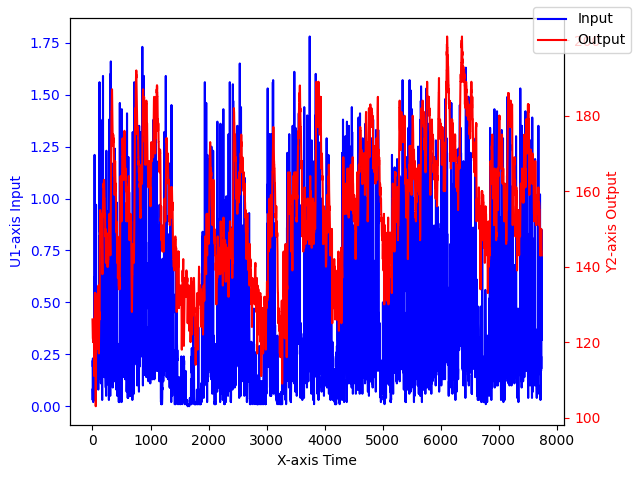

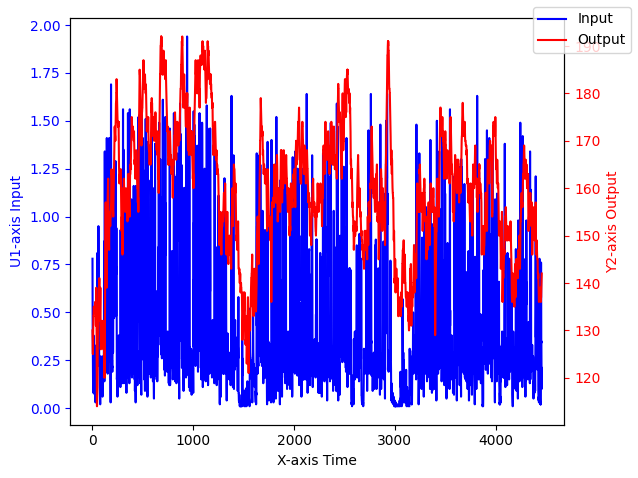

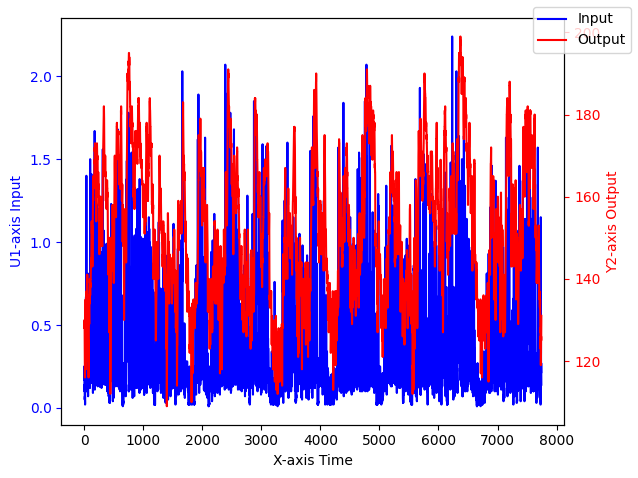

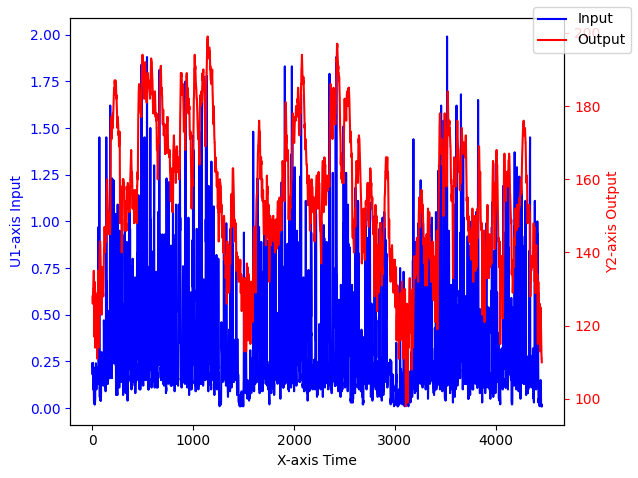

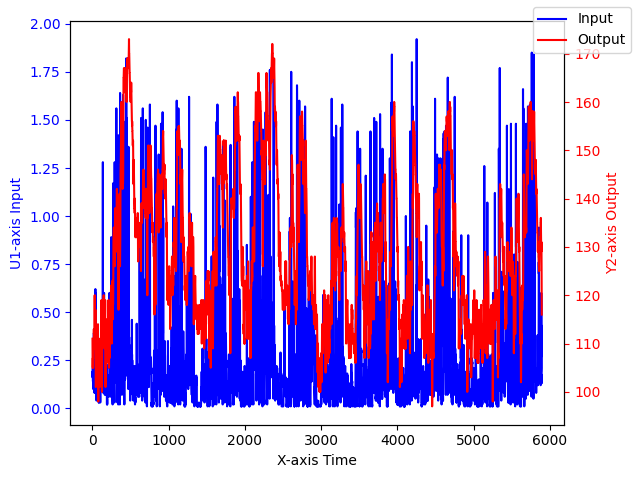

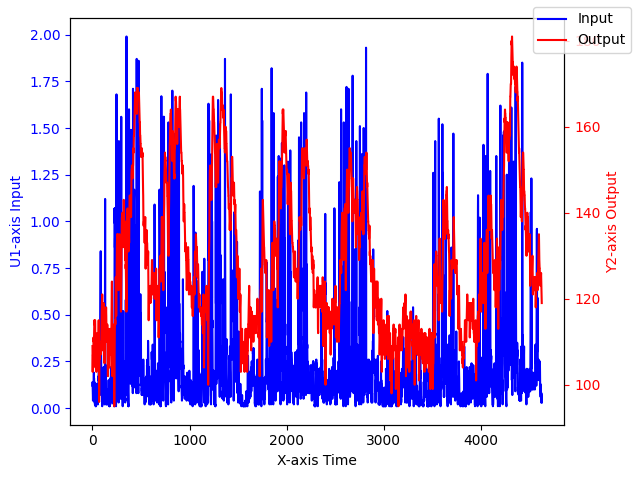

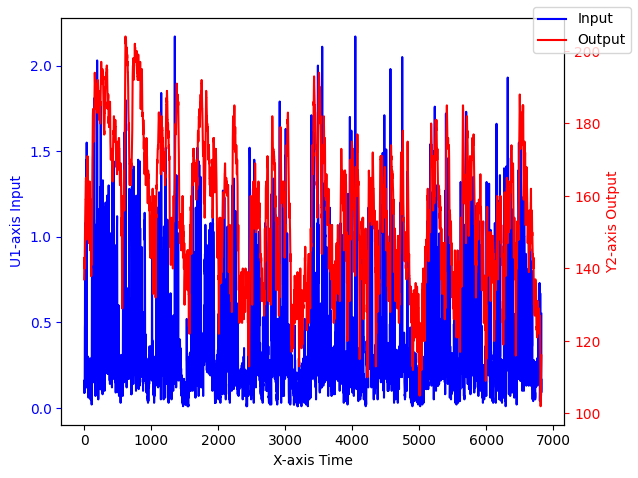

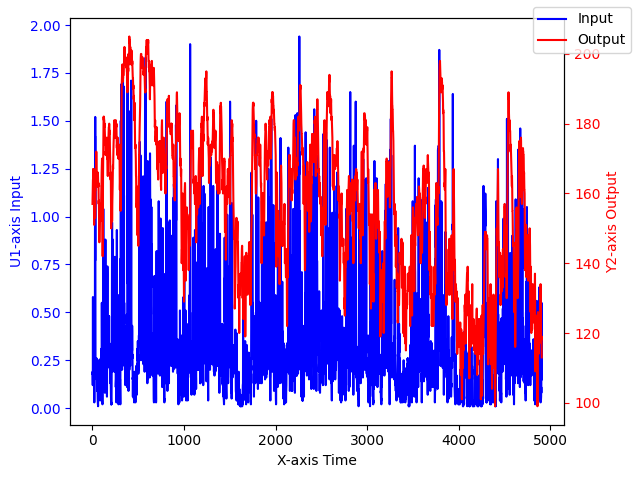

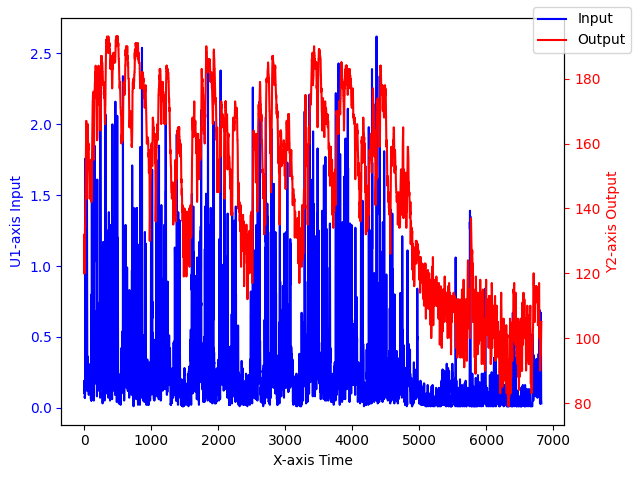

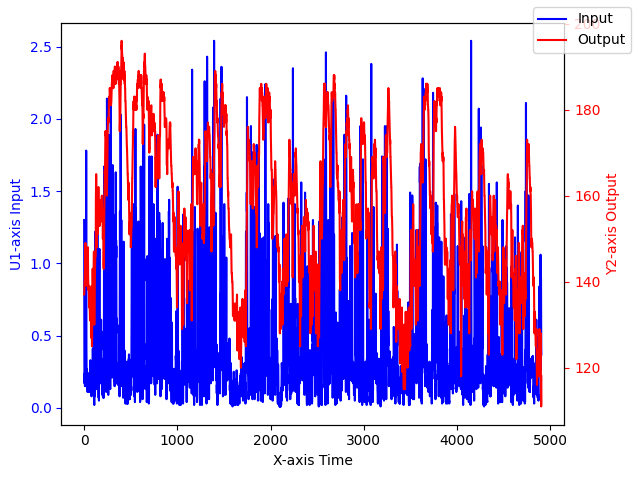

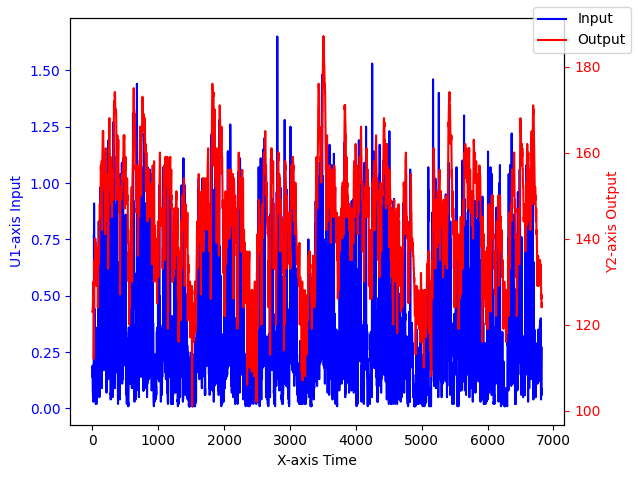

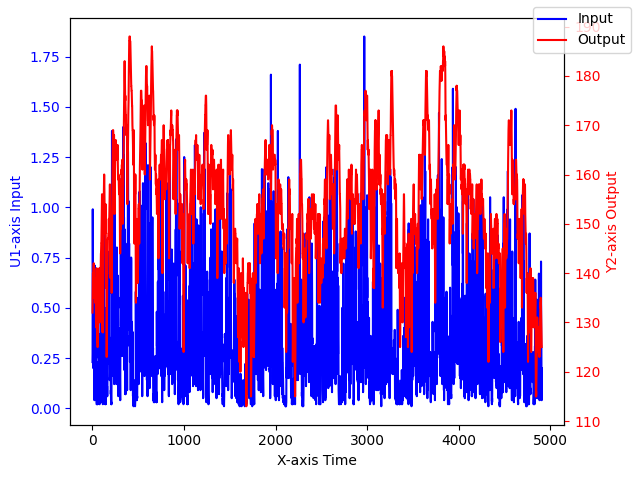

In [24]:
#1ºData Preparation
#Pre-processing && Ploting

for athlete in athlete_list:
  #Start all values at Zero
  #athlete['u'] = athlete['u'] - athlete['u'][0]
  #athlete['y'] = athlete['y'] - athlete['y'][0]
  print(f"Athlete:{athlete.shape}")

  #Ploting using two axis with different scales
  fig, ax1 = plt.subplots()
  ax1.plot(athlete['u'], color='blue', label='Input')
  ax1.set_xlabel('X-axis Time')
  ax1.set_ylabel('U1-axis Input', color='blue')
  ax1.tick_params('y', colors='blue')
  ax2 = ax1.twinx()

  #print("Mean of y:", y_mean)
  #print("Variance of y:", np.var(y))
  ax2.plot(athlete['y'], color='red', label='Output')
  ax2.set_ylabel('Y2-axis Output', color='red')
  ax2.tick_params('y', colors='red')
  fig.legend(loc="upper right")
  fig.tight_layout()


## 2º System Identification

Athlete: A1M1

Model #0 
with 0 a parameters, 1 b parameters and 0 time delay
its regression yield r squared: -17.320911743602657, Akaike's information criteria: 22516.069878948874

Model #1 
with 0 a parameters, 1 b parameters and 1 time delay
its regression yield r squared: -17.215327940076385, Akaike's information criteria: 22468.421243721397

Model #2 
with 0 a parameters, 1 b parameters and 2 time delay


<ipython-input-96-e4b1a4f8bd89>:77: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, new_row], ignore_index=True)


its regression yield r squared: -17.11937679603699, Akaike's information criteria: 22424.63995916361

Model #3 
with 0 a parameters, 1 b parameters and 3 time delay
its regression yield r squared: -17.052038883580597, Akaike's information criteria: 22392.928583530054

Model #4 
with 0 a parameters, 1 b parameters and 4 time delay
its regression yield r squared: -17.00884858990144, Akaike's information criteria: 22371.499638408794

Model #5 
with 0 a parameters, 2 b parameters and 0 time delay
its regression yield r squared: -15.367491581268652, Akaike's information criteria: 21642.39521474428

Model #6 
with 0 a parameters, 2 b parameters and 1 time delay
its regression yield r squared: -15.268018874923044, Akaike's information criteria: 21592.416887786523

Model #7 
with 0 a parameters, 2 b parameters and 2 time delay
its regression yield r squared: -15.187461368005202, Akaike's information criteria: 21551.209778682023

Model #8 
with 0 a parameters, 2 b parameters and 3 time delay
it

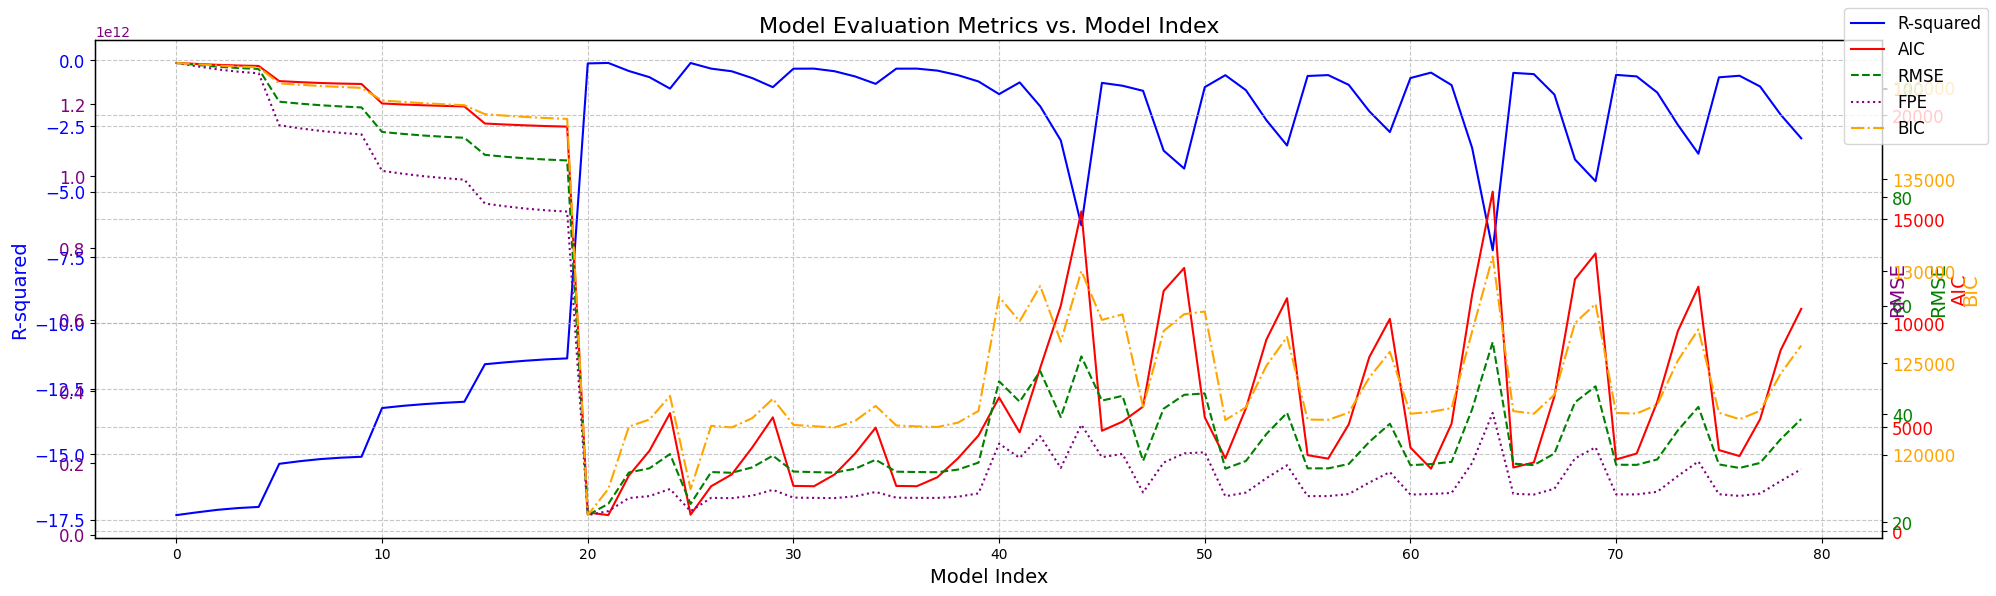

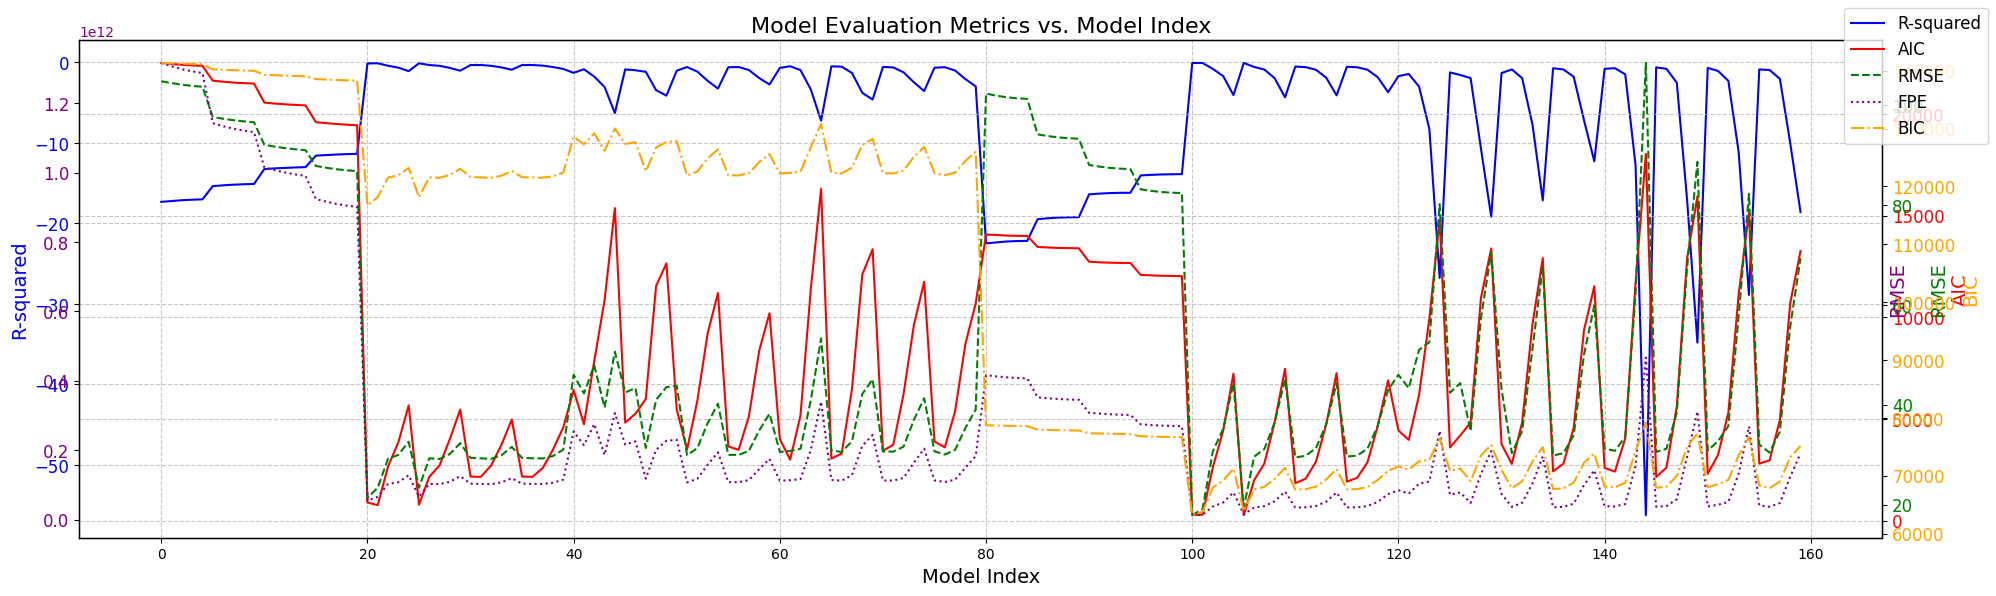

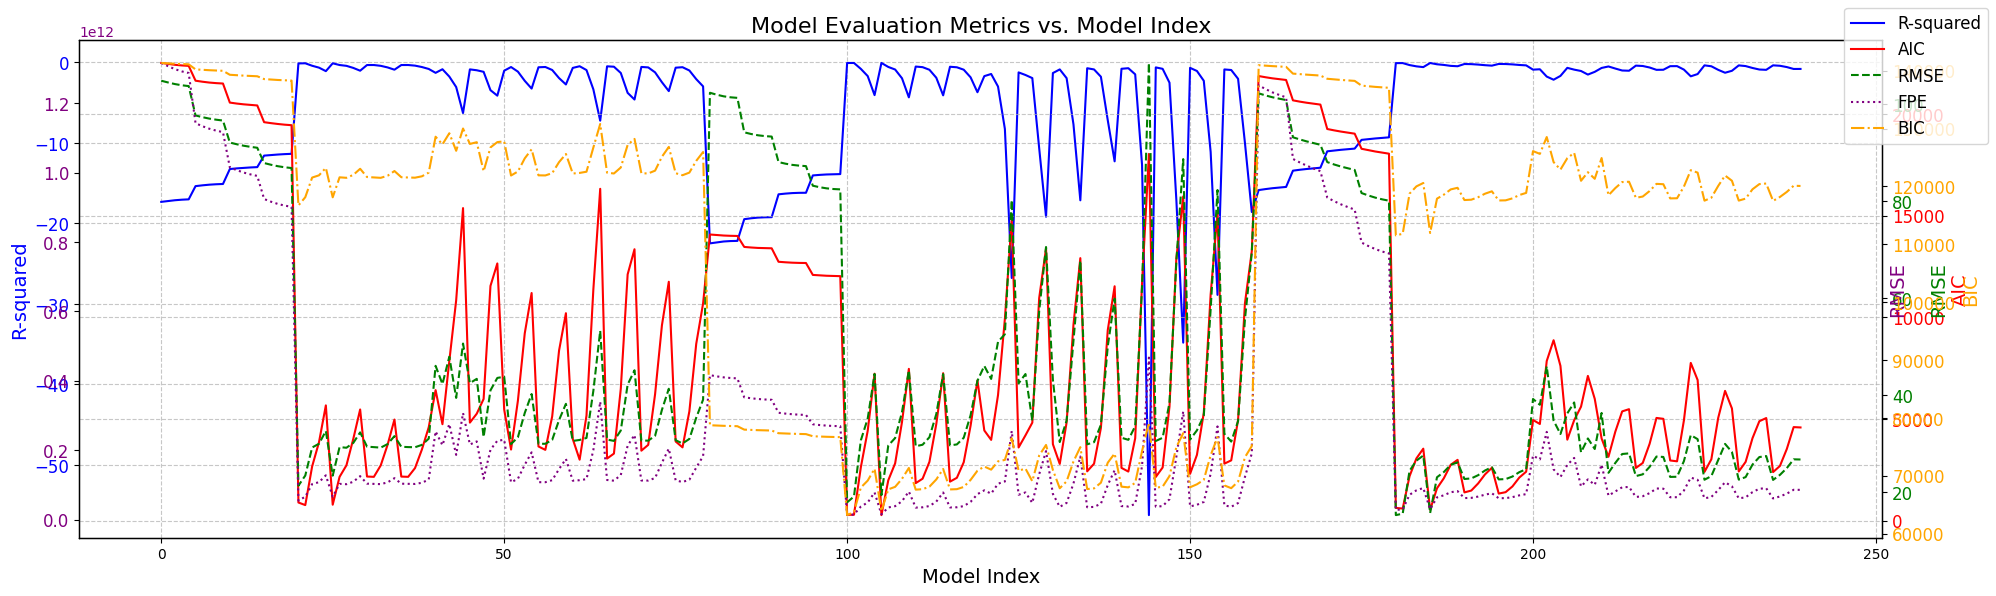

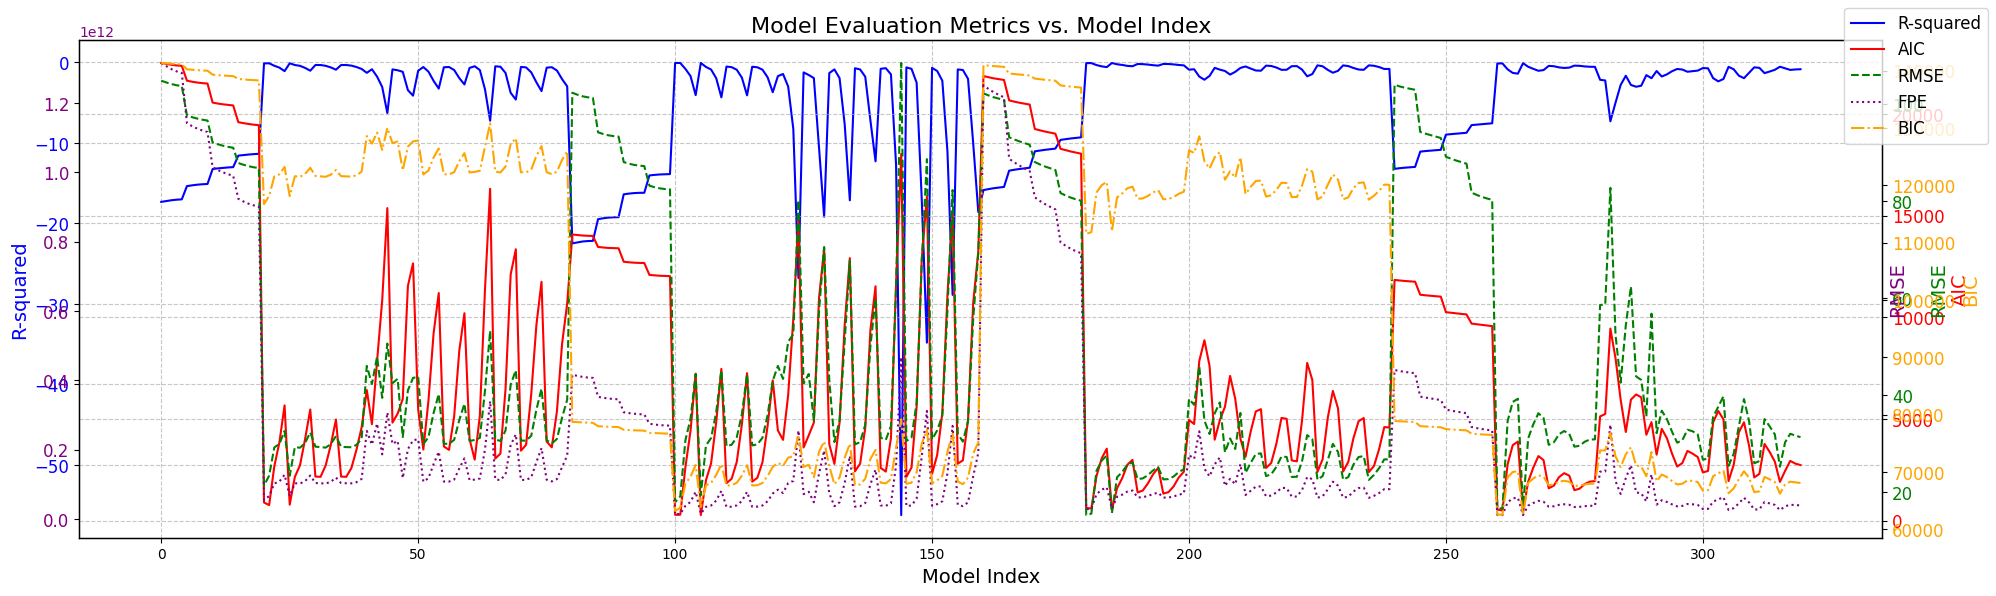

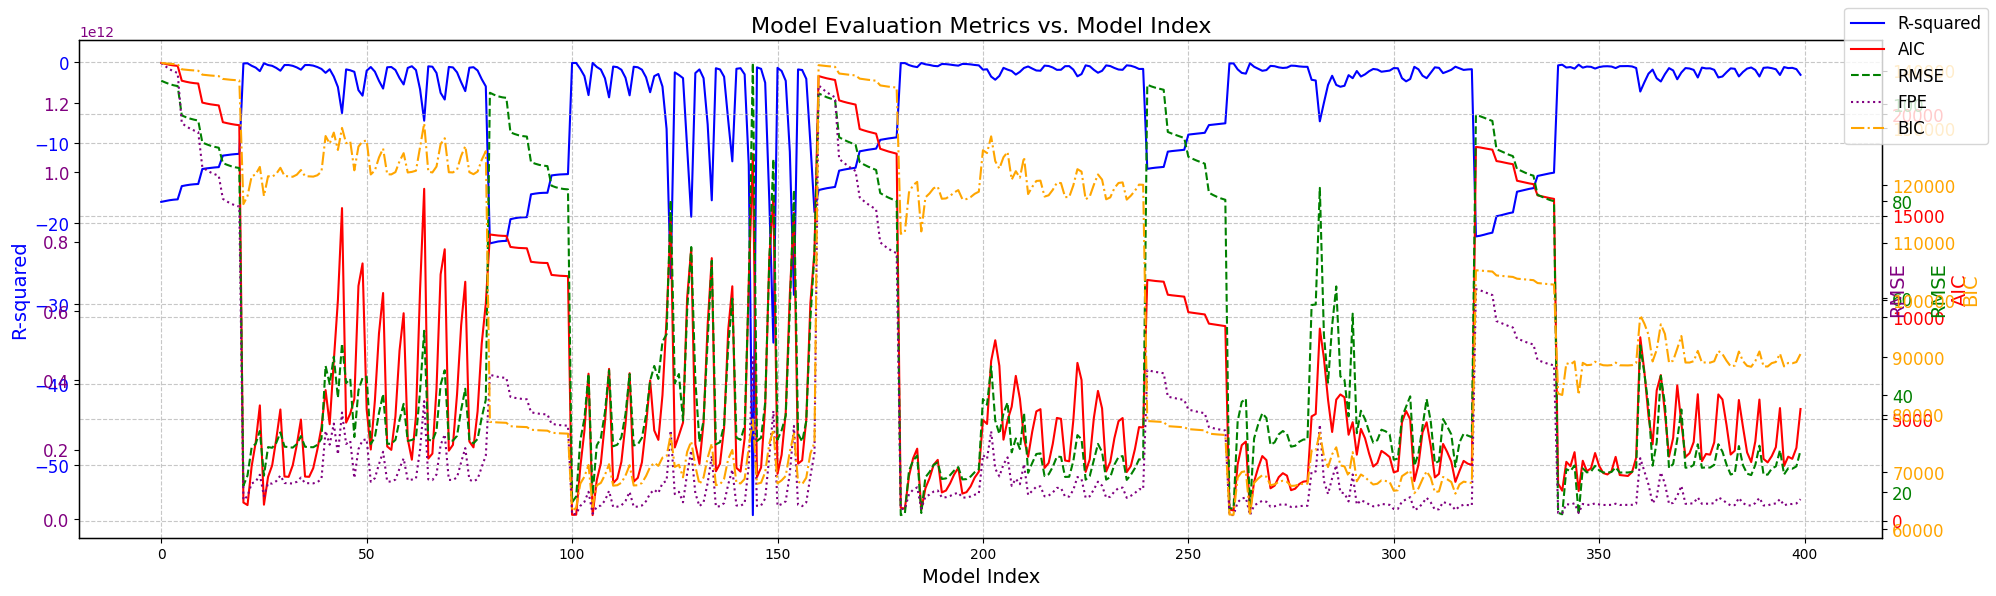

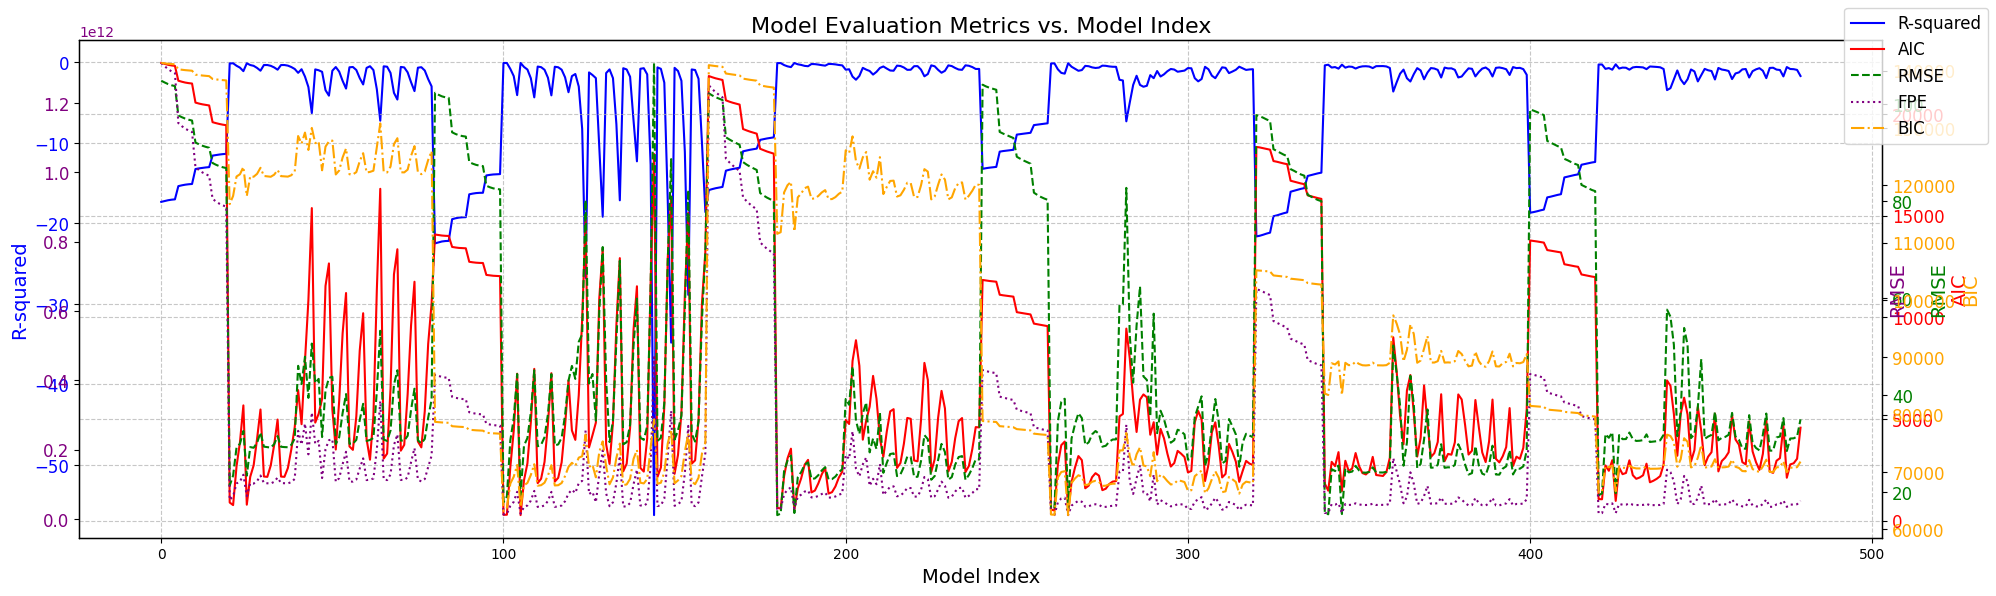

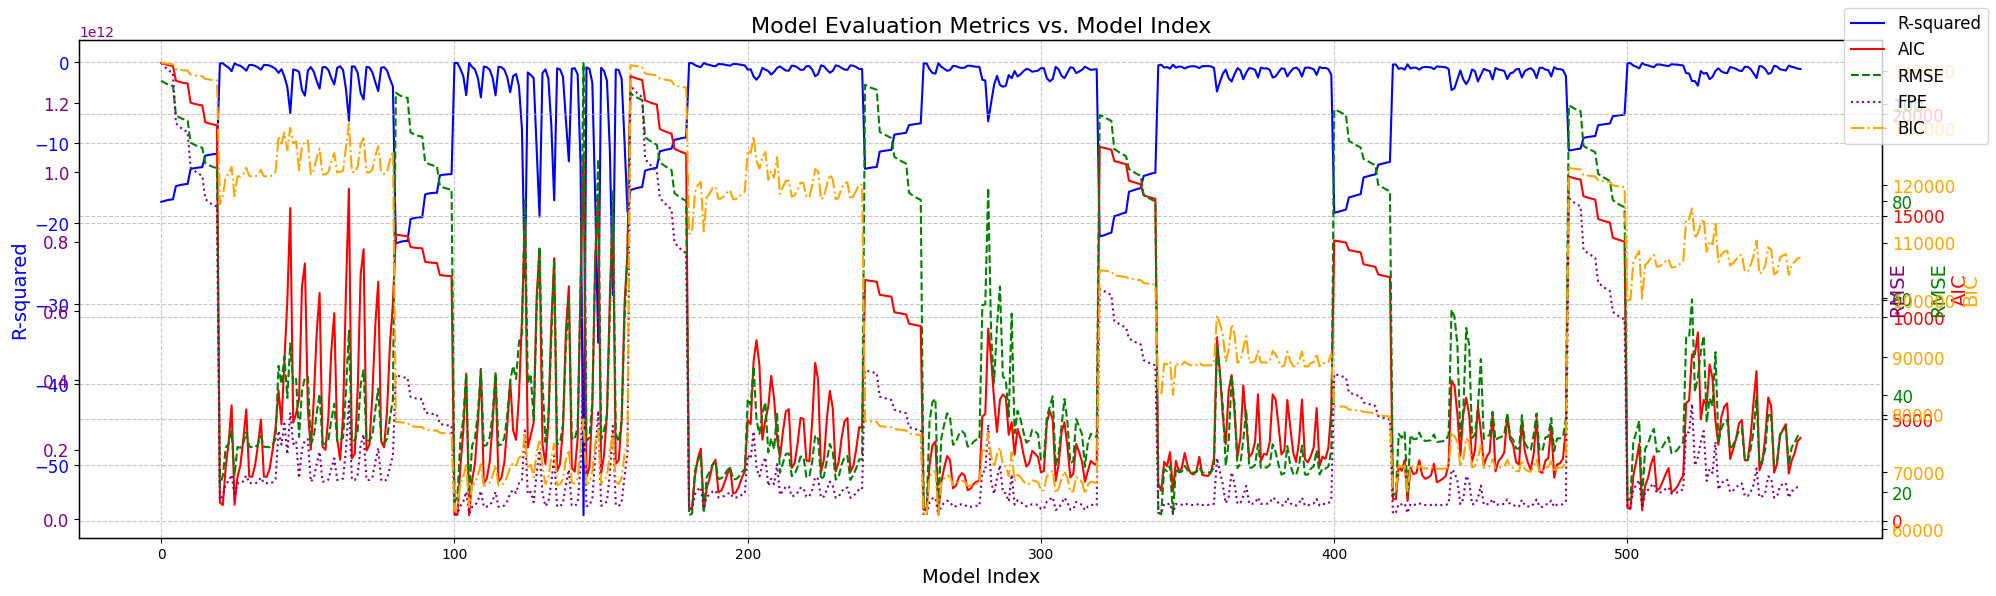

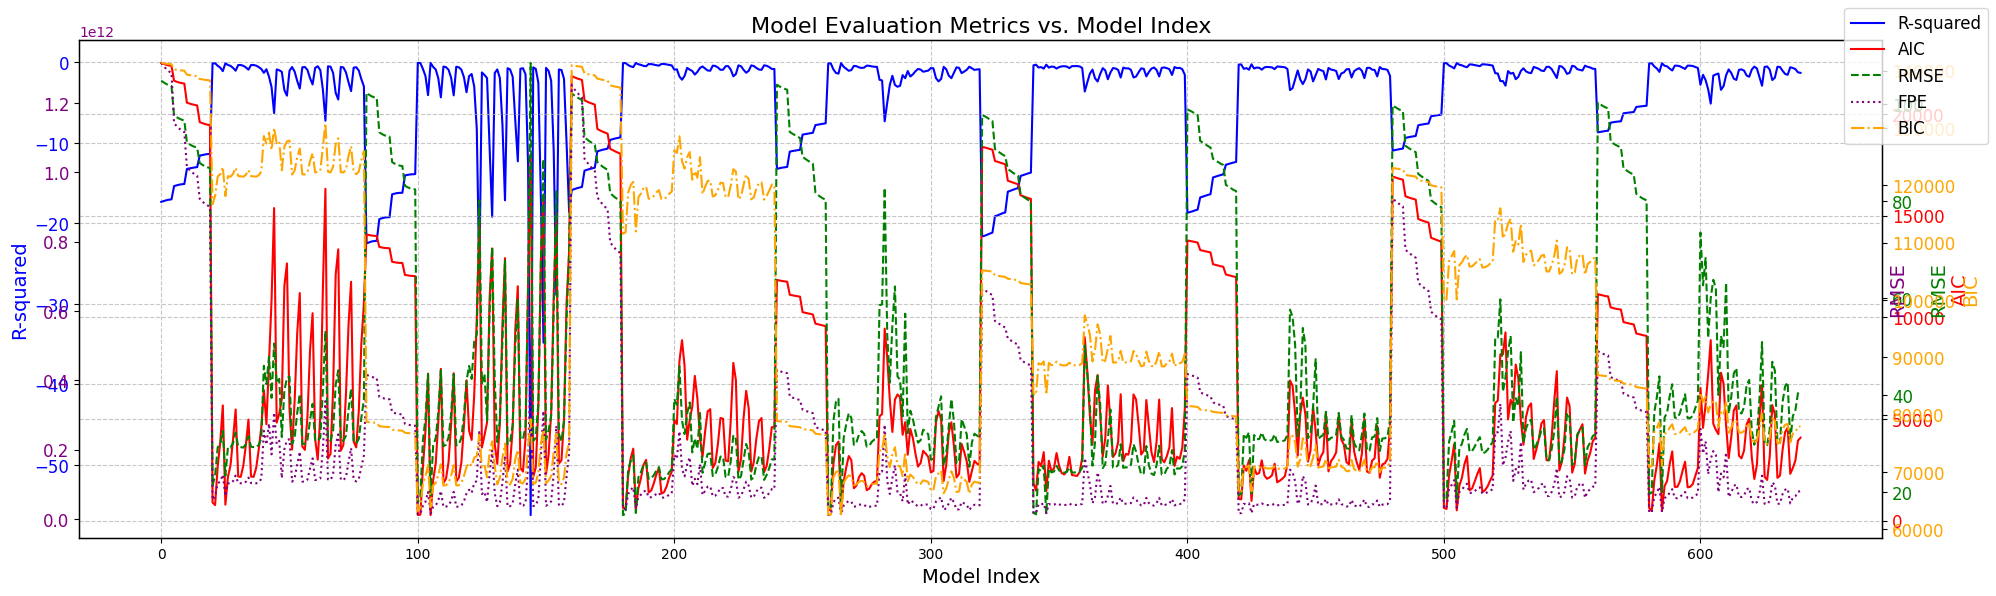

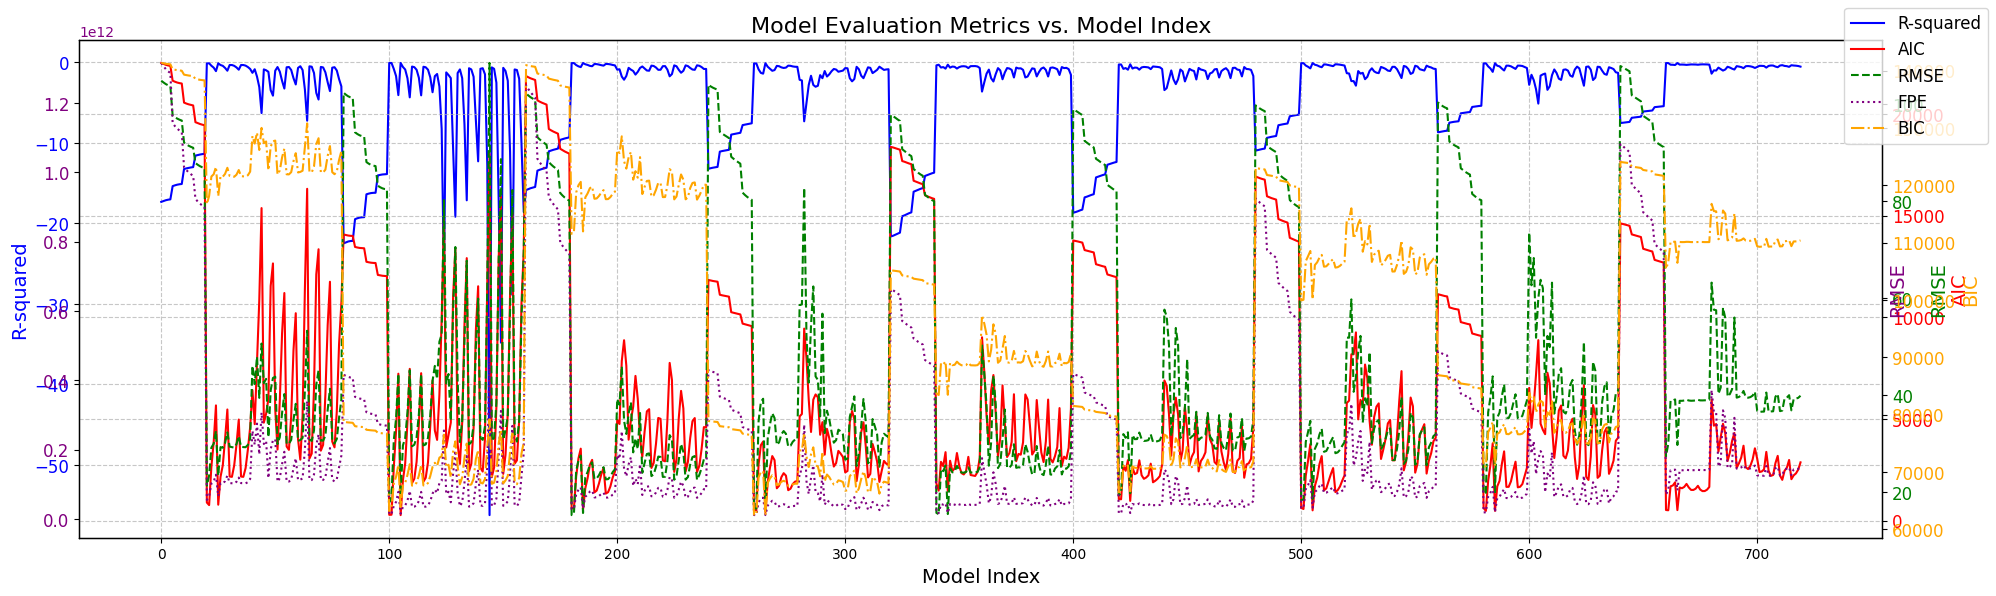

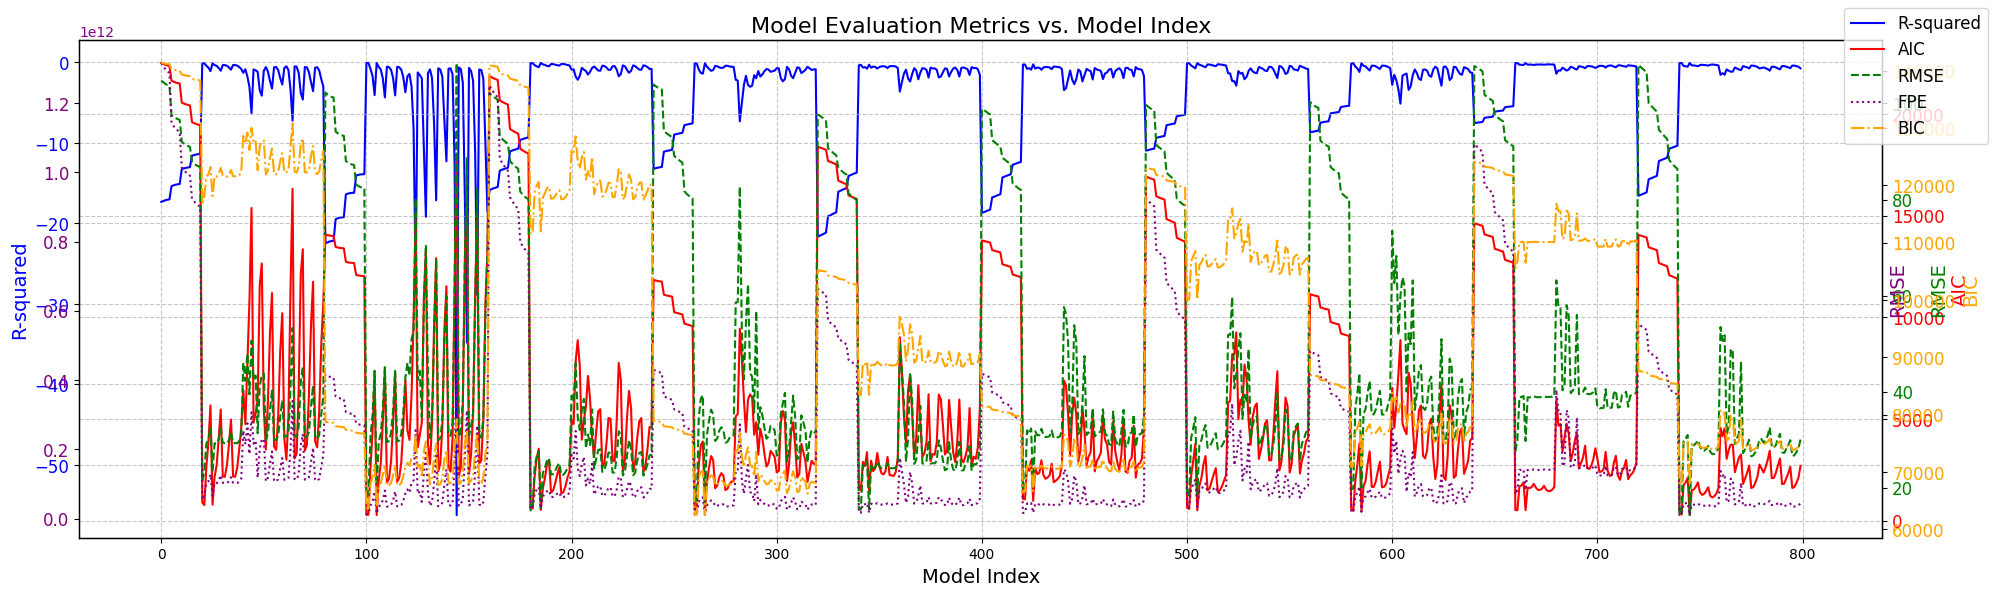

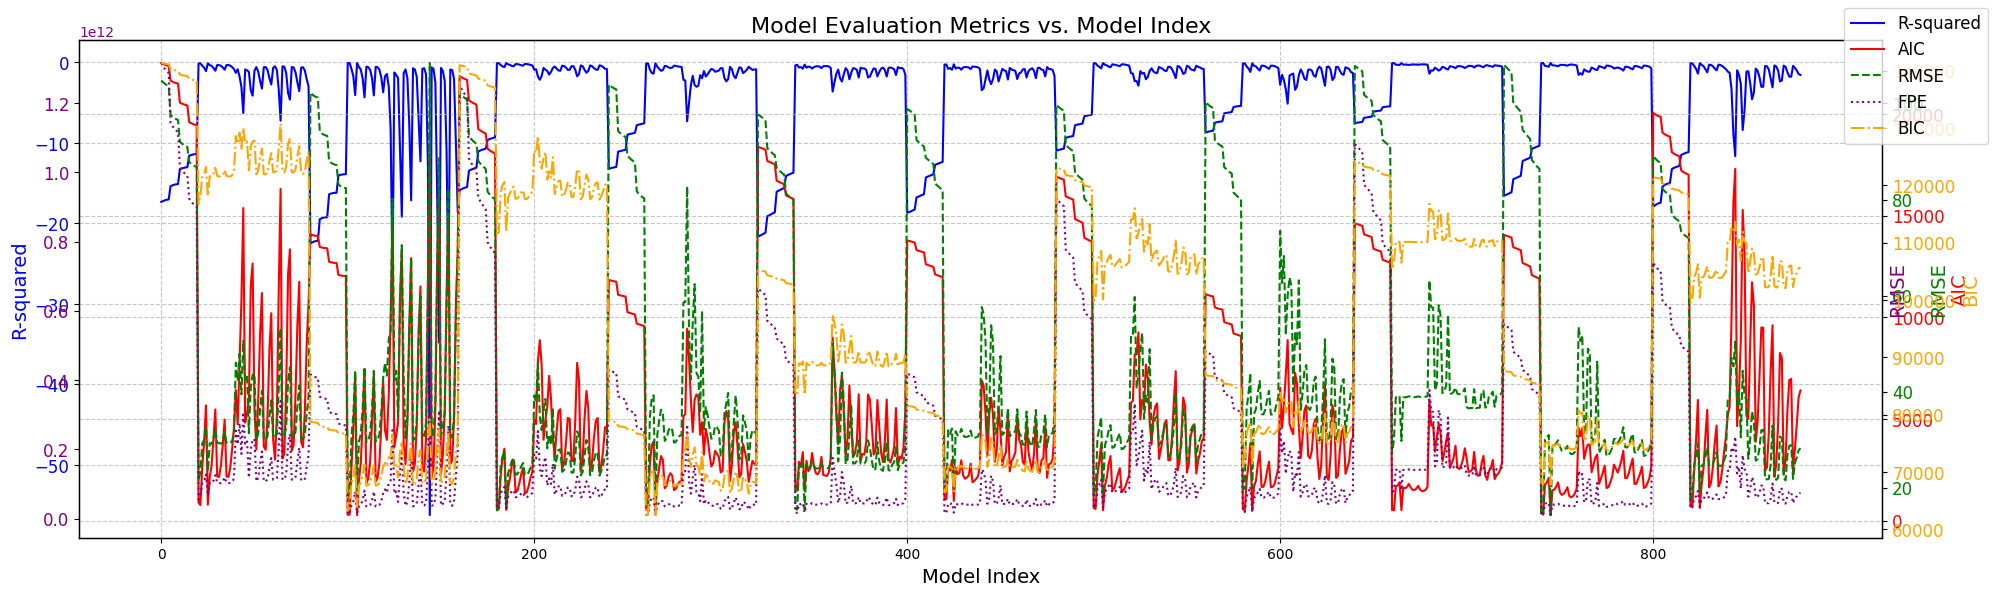

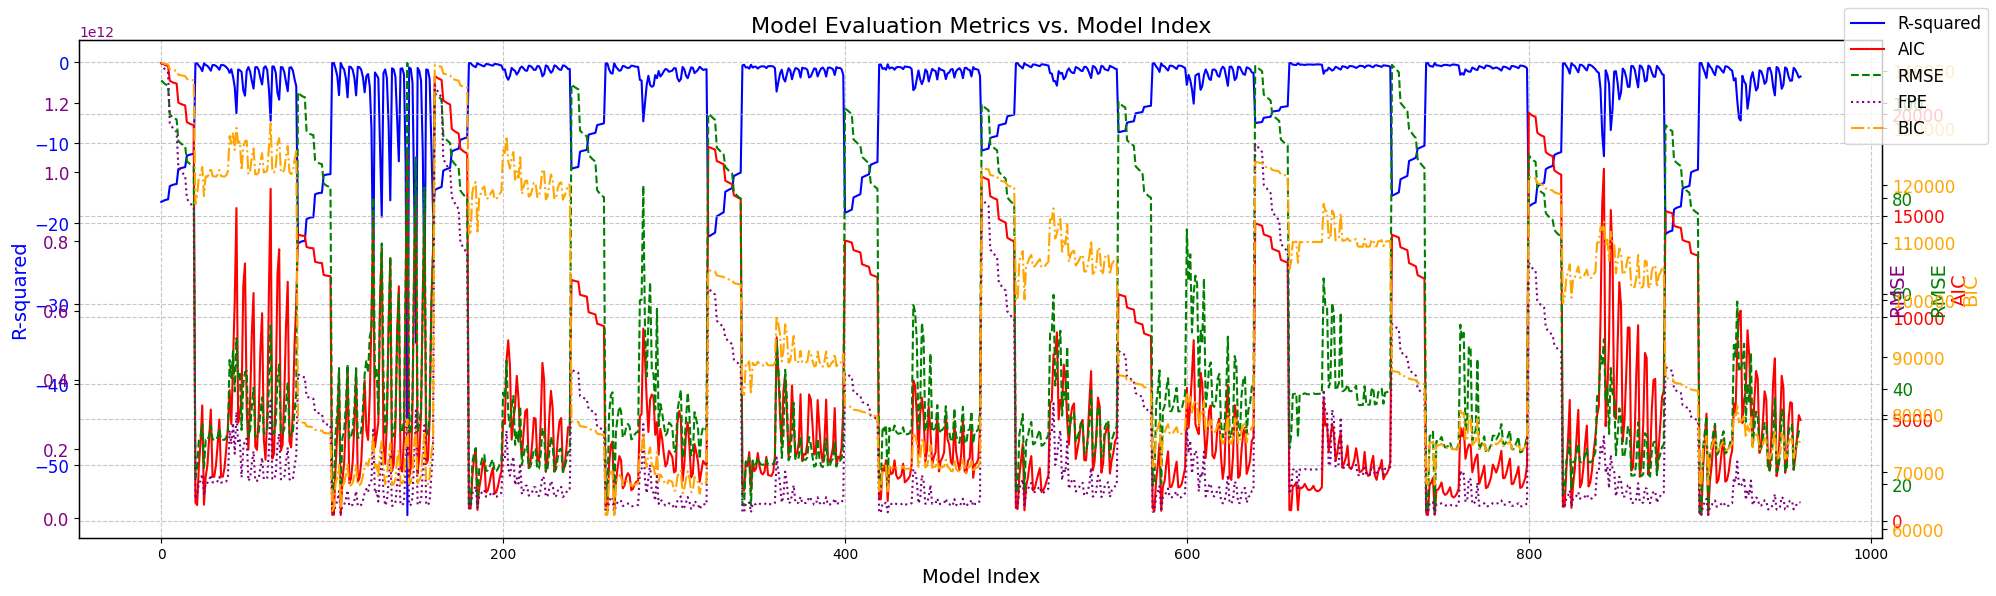

In [96]:
from re import X
# Find the best model structure (time-invariant modelling)
results_df = pd.DataFrame(columns=['Athlete_Code','Model_Index', 'na', 'nb', 'd', 'AIC', 'Rsq','RMSE','BIC','FPE'])
selected_models = pd.DataFrame(columns=['Athlete_Code','ParamCount','ParamValues','Metrics'])  #ParamCount[na:nb:d] || ParamValues[na,nb] || Metrics[Rsq, AIC, FPE]

# Calculate ARX models to the evaluation data with all possible parameters to find the best fit by checking r-squared and AIC
# Define a max for a, b, and delay (d)
na_max = nb_max = xdelay_max = 4
model_count=0

##Loop through parameters
#Starts 1:1:0 .... 3,3,3               (1,na_max|1,nb_max|xdelay_max) (max=4)
#Starts 1:1:0 .... 4,4,4               (1,na_max+1|1,nb_max+1|xdelay_max+1)(max=4)
for i in range(len(athlete_list)):
  data = athlete_list[i]
  model_count=0
  print(f"Athlete: {code_name[i]}")
  for na in range(na_max):
    for nb in range(1,nb_max+1):
      for d in range(xdelay_max+1):
        print('\nModel #{} \nwith {} a parameters, {} b parameters and {} time delay'.format(model_count,na,nb,d))
        #load the associated data using dataloader(data, na, nb, d)
        X_loader, y_loader = dataloader(data, na,  nb, d)
        #print("X_loader:",X_loader)#print("y_loader:",y_loader)


        #Correction to use python## Only when values are equal to zero
        if X_loader.empty:#
            print("Skipping model due to empty X_loader.")
            continue # proceed to next iteration
        if y_loader.empty:
            print("Skipping model due to empty y_loader.")
            continue # proceed to next iteration


        ##Calculate the a and b parameters
        # parameters vector [a0...an, b0...bm].T by the formula inv(X.T dot X) dot X.T dot y
        parameters = np.linalg.inv(X_loader.T.dot(X_loader)).dot(X_loader.T).dot(y_loader)
        parameters_a = parameters[:na]
        parameters_b = parameters[na:]


        ## Simulate values of Y
        ysim = np.zeros(len(y_loader)) # the plus one is because the first value is initialized and not simulated
        ysim[0]= y_loader.values[0] # initialize the first value
        max_lag= max(na,nb+d-1)  # Maximum lag across both endogenous and exogenous variables

        for k in range(max_lag, len(X_loader)):
        # Add the contribution from autoregressive terms (endogenous variables)
          for i_a in range(1,na+1):
              #print("parameter a: ",i_a)
              ysim[k] += parameters_a[i_a-1] * ysim[k - i_a]  # Note: parameters_a starts at index 0

        # Add the contribution from exogenous input terms (with delay d)
          for j_b in range(nb):
              #print("parameter b: ",j_b)
              ysim[k] += parameters_b[j_b] * X_loader['u-{}'.format(d+j_b)].iloc[k-j_b]  # Note: parameters_b starts at index 0
              #print('u-{}'.format(d+j_b),j_b,d)


        ## Model evaluation for each generated model use r_squared and aic def above
        # Calculate r-squared and AIC and RMSE and BIC and FPE
        n = len(y_loader)
        SSR = np.sum((y_loader - ysim) ** 2)
        #Calculate usefull Model evaluation parameters
        r_squared = r_2(y_loader, ysim)
        aic =  2 * (na + nb) + len(y_loader) * np.log(1 - r_squared) # Evaluates the complexicity of the Model
        Rmse = rmse(y_loader, ysim[0:])  #Root Mean Squared Error (Less sensitive to outliers: It is less affected by extreme errors compared to RMSE)
        fpe = SSR * (n + k) / (n - k)                  #Final Prediction Error(used for model order selection)(Considers both model fit and complexity) (Asymptotically equivalent to AIC: For large sample sizes, FPE and AIC tend to select the same model)
        bic = n * np.log(SSR / n) + k * np.log(n)      #Bayesian Information Criterion (BIC penalizes model complexity more heavily than AIC.)(Consistent: more likely to select the true model when sample is bigger)


        print("its regression yield r squared: {}, Akaike's information criteria: {}".format(r_squared, aic))

        # Save relevant information to the empty lists
        new_row = pd.DataFrame({'Athlete_Code': code_name[i],'Model_Index': [model_count], 'na': [na], 'nb': [nb], 'd': [d], 'AIC': [aic], 'Rsq': [r_squared],'RMSE':[Rmse], 'BIC':[bic],'FPE':[fpe]})
        results_df = pd.concat([results_df, new_row], ignore_index=True)

        # Update the model counter
        model_count += 1



  #Plot for each player/game
  fig, ax1 = plt.subplots(figsize=(20, 6))
  X_axis = np.arange(len(results_df)) #results_df['Model_Index']

  #For R-square Error
  ax1.plot(X_axis, results_df['Rsq'], color='blue', label='R-squared')
  ax1.set_xlabel('Model Index', fontsize=14)  # Increased font size
  ax1.set_ylabel('R-squared', color='blue', fontsize=14)  # Increased font size
  ax1.tick_params(axis='y', labelcolor='blue', labelsize=12)  # Increased tick label size

  #For AIC
  ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
  ax2.plot(X_axis, results_df['AIC'], color='red', label='AIC')
  ax2.set_ylabel('AIC', color='red', fontsize=14)  # Increased font size
  ax2.tick_params(axis='y', labelcolor='red', labelsize=12)  # Increased tick label size

  #For RMSE
  ax3 = ax1.twinx()
  ax3.plot(X_axis, results_df['RMSE'], color='green', label='RMSE', linestyle='--')
  ax3.set_ylabel('RMSE', color='green', fontsize=14)
  ax3.tick_params(axis='y', labelcolor='green', labelsize=12)

  #For FPE
  ax4 = ax1.twinx()
  ax4.plot(X_axis, results_df['FPE'], color='purple', label='FPE', linestyle=':')
  ax4.set_ylabel('RMSE', color='purple', fontsize=14)
  ax4.tick_params(axis='y', labelcolor='purple', labelsize=12)

  #For BIC
  ax5 = ax4.twinx()
  ax5.plot(X_axis, results_df['BIC'], color='orange', label='BIC', linestyle='-.')
  ax5.set_ylabel('BIC', color='orange', fontsize=14)
  ax5.tick_params(axis='y', labelcolor='orange', labelsize=12)

  # General graphic configs
  fig.legend(loc="upper right", fontsize=12)  # Add a legend for both plots, increased font size
  ax1.grid(True, linestyle='--', alpha=0.7)  # Added grid with dashed lines and transparency
  ax2.grid(True, linestyle='--', alpha=0.7)  # Added grid with dashed lines and transparency
  plt.title('Model Evaluation Metrics vs. Model Index', fontsize=16)  # Added title with increased font size
  plt.tight_layout()  # Adjust layout to prevent overlapping elements
plt.show()

In [76]:
results_df[:10]

Athlete_Code Model_Index na nb  d           AIC        Rsq        RMSE  \
0         A1M1           0  0  1  0  22516.069879 -17.320912  104.774216   
1         A1M1           1  0  1  1  22468.421244 -17.215328  104.413605   
2         A1M1           2  0  1  2  22424.639959 -17.119377  104.083291   
3         A1M1           3  0  1  3  22392.928584 -17.052039  103.839450   
4         A1M1           4  0  1  4  22371.499638 -17.008849  103.669922   
5         A1M1           5  0  2  0  21642.395215 -15.367492   97.625565   
6         A1M1           6  0  2  1  21592.416888 -15.268019   97.269599   
7         A1M1           7  0  2  2  21551.209779 -15.187461   96.973326   
8         A1M1           8  0  2  3  21522.932414 -15.134219   96.747445   
9         A1M1           9  0  2  4  21503.319984 -15.099158   96.570706   

             BIC           FPE  
0  141344.719721  1.315883e+12  
1  141272.084053  1.306503e+12  
2  141203.784468  1.297914e+12  
3  141148.236562  1.291506e+12  
4  141103.710323  1.286960e+12  
5  140231.374985  1.142150e+12  
6  140155.711769  1.133543e+12  
7  140089.386377  1.126357e+12  
8  140034.193271  1.120827e+12  
9  139986.801474  1.116447e+12

In [115]:
#Select Best Models
scaler = MinMaxScaler()
normalized_metrics = scaler.fit_transform(results_df[['AIC', 'Rsq', 'FPE', 'BIC', 'RMSE']])
# Create a new DataFrame with the normalized metrics
normalized_df = pd.DataFrame(normalized_metrics, columns=['AIC_norm', 'Rsq_norm', 'FPE_norm', 'BIC_norm', 'RMSE_norm'])
selection_df = pd.concat([results_df, normalized_df], axis=1)


#best_models_df = pd.DataFrame(columns=['Athlete_Code','ParamCount','ParamValues','Metrics'])  #ParamCount[na:nb:d] || ParamValues[na,nb] || Metrics[Rsq, AIC, FPE]
best_models_df = pd.DataFrame()


num_models = na_max*nb_max*(xdelay_max+1)
cases = len(results_df)/(num_models) #12

#LOOP for each case (models)
for i in range(int(cases)):
  print("Case: ",i,"Start: ",(i*num_models),"End: ",(i+1)*num_models)
  #Select each dataset models data
  selected_df = selection_df[(i*num_models):(i+1)*num_models].copy()

  #Create a Ranking Selection
  selected_df['AIC_rank'] = selected_df['AIC'].rank()
  selected_df['BIC_rank'] = selected_df['BIC'].rank()

  # Rank by Rsq
  selected_df['Rsq_rank'] = selected_df['Rsq'].rank(ascending=False)  # Note: ascending=False for Rsq

  # Calculate the combined ranking
  selected_df['Ranking'] = selected_df['Rsq_rank'] + selected_df['BIC_rank']

  best_df = selected_df.sort_values(by='Ranking', ascending=True).iloc[0]
  #new_row = pd.DataFrame({'Athlete_Code':[filter['Athlete_Code'][0]],'ParamCount'["{}:{}:{}".format(filter['na'][0],filter['nb'][0],filter['d'][0])],'ParamValues':[],'Metrics':[filter['Rsq'][0],filter['AIC'][0],filter['FPE'][0]]})

  #print(best_df)
  print(selected_df.sort_values(by='Ranking', ascending=True))



  new_row = pd.DataFrame({'Athlete_Code': [best_df['Athlete_Code']],
                          'na': [best_df['na']],
                          'nb': [best_df['nb']],
                          'd': [best_df['d']],
                          'Ranking': [best_df['Ranking']],
                          'AIC_rank': [best_df['AIC_rank']],
                          'Rsq_rank': [best_df['Rsq_rank']],
                          'BIC_rank': [best_df['BIC_rank']],
                          'Rsq': [best_df['Rsq']],
                          'AIC': [best_df['AIC']],
                          'BIC': [best_df['BIC']],
                          'FPE': [best_df['FPE']]})

  best_models_df = pd.concat([best_models_df, new_row], ignore_index=True)

  #print(selected_df.sort_values(by='Rsq', ascending=False)[:3])
  #print(selected_df.sort_values(by='AIC', ascending=True)[:3])
  #print(selected_df.sort_values(by='FPE', ascending=True)[:3])


Case:  0 Start:  0 End:  80
   Athlete_Code Model_Index na nb  d           AIC        Rsq        RMSE  \
21         A1M1          21  1  1  1    761.251837  -0.102768   23.434915   
25         A1M1          25  1  2  0    781.306219  -0.105343   23.410022   
20         A1M1          20  1  1  0    888.566340  -0.121039   21.349714   
36         A1M1          36  1  4  1   2152.115780  -0.318943   29.296207   
31         A1M1          31  1  3  1   2150.936943  -0.319036   29.281493   
..          ...         ... .. .. ..           ...        ...         ...   
4          A1M1           4  0  1  4  22371.499638 -17.008849  103.669922   
3          A1M1           3  0  1  3  22392.928584 -17.052039  103.839450   
2          A1M1           2  0  1  2  22424.639959 -17.119377  104.083291   
1          A1M1           1  0  1  1  22468.421244 -17.215328  104.413605   
0          A1M1           0  0  1  0  22516.069879 -17.320912  104.774216   

              BIC           FPE  AIC_norm  Rsq_

In [116]:
best_models_df

Athlete_Code  na  nb  d  Ranking  AIC_rank  Rsq_rank  BIC_rank       Rsq  \
0          A1M1   1   1  1      4.0       1.0       1.0       3.0 -0.102768   
1          A1M2   1   1  0      3.0       2.0       2.0       1.0 -0.064277   
2          A2M1   1   1  0      4.0       3.0       3.0       1.0 -0.083251   
3          A2M2   1   2  0      2.0       1.0       1.0       1.0 -0.095774   
4          A3M1   1   1  1      3.0       2.0       2.0       1.0 -0.282586   
5          A3M2   1   2  0      4.0       1.0       1.0       3.0 -0.231272   
6          A4M1   1   1  0      4.0       3.0       3.0       1.0 -0.095150   
7          A4M2   1   1  1      3.0       1.0       1.0       2.0 -0.100770   
8          A5M1   1   1  0      4.0       3.0       3.0       1.0 -0.078503   
9          A5M2   1   2  0      3.0       1.0       1.0       2.0 -0.057324   
10         A6M1   1   1  1      4.0       2.0       2.0       2.0 -0.105964   
11         A6M2   1   2  0      4.0       1.0       1.0       3.0 -0.056082   

            AIC            BIC           FPE  
0    761.251837  118139.917197  6.581469e+10  
1    281.777553   63196.473259  1.277032e+10  
2    623.104004  111536.232084  2.799517e+10  
3    413.734186   62462.367857  1.086349e+10  
4   1470.641858   83419.592367  1.658501e+10  
5    968.012797   66625.373078  1.676369e+10  
6    624.063066   99918.664532  3.136038e+10  
7    474.830815   70996.319530  1.904006e+10  
8    519.568212  105401.051039  7.004786e+10  
9    279.354024   67773.205937  9.868063e+09  
10   690.992139  100117.959458  3.235486e+10  
11   273.589875   67788.048858  9.897976e+09

In [123]:
results_df.sort_values(by='Rsq', ascending=False)
#Rsq: 1,5,0,16,11,6,15,10,61
#AIC: 1,5,0,6,11,16,15,10,61
#FPE: 0,5,1,60,72,71,62,75,76

Athlete_Code Model_Index na nb  d           AIC        Rsq        RMSE  \
905         A6M2          25  1  2  0    273.589875  -0.056082   14.345969   
745         A5M2          25  1  2  0    279.354024  -0.057324   14.324275   
901         A6M2          21  1  1  1    287.717739  -0.059561   14.185428   
741         A5M2          21  1  1  1    289.359743  -0.059915   14.312353   
105         A1M2          25  1  2  0    268.391210  -0.060625   19.398061   
..           ...         ... .. .. ..           ...        ...         ...   
80          A1M2           0  0  1  0  14074.872605 -22.477916  102.294671   
124         A1M2          44  2  1  4  14816.003799 -26.781088   80.174098   
154         A1M2          74  3  3  4  15139.295118 -28.877389   82.257024   
149         A1M2          69  3  2  4  15947.829387 -34.813260   88.625913   
144         A1M2          64  3  1  4  18038.700155 -56.242419  108.439098   

              BIC           FPE  
905  67788.048858  9.897976e+09  
745  67773.205937  9.868063e+09  
901  67677.672536  9.677687e+09  
741  67765.039675  9.851644e+09  
105  63887.227623  1.495471e+10  
..            ...           ...  
80   78730.380449  4.160660e+11  
124  76484.764913  2.551202e+11  
154  76676.849138  2.683074e+11  
149  77359.388648  3.116041e+11  
144  79175.479918  4.667115e+11  

[960 rows x 10 columns]

Den(a):  [0.9953557]
Num(b):  [0.23154824 1.88663214]
[132. 132.   0. ...   0.   0.   0.]
[   0    1    2 ... 4903 4904 4905]


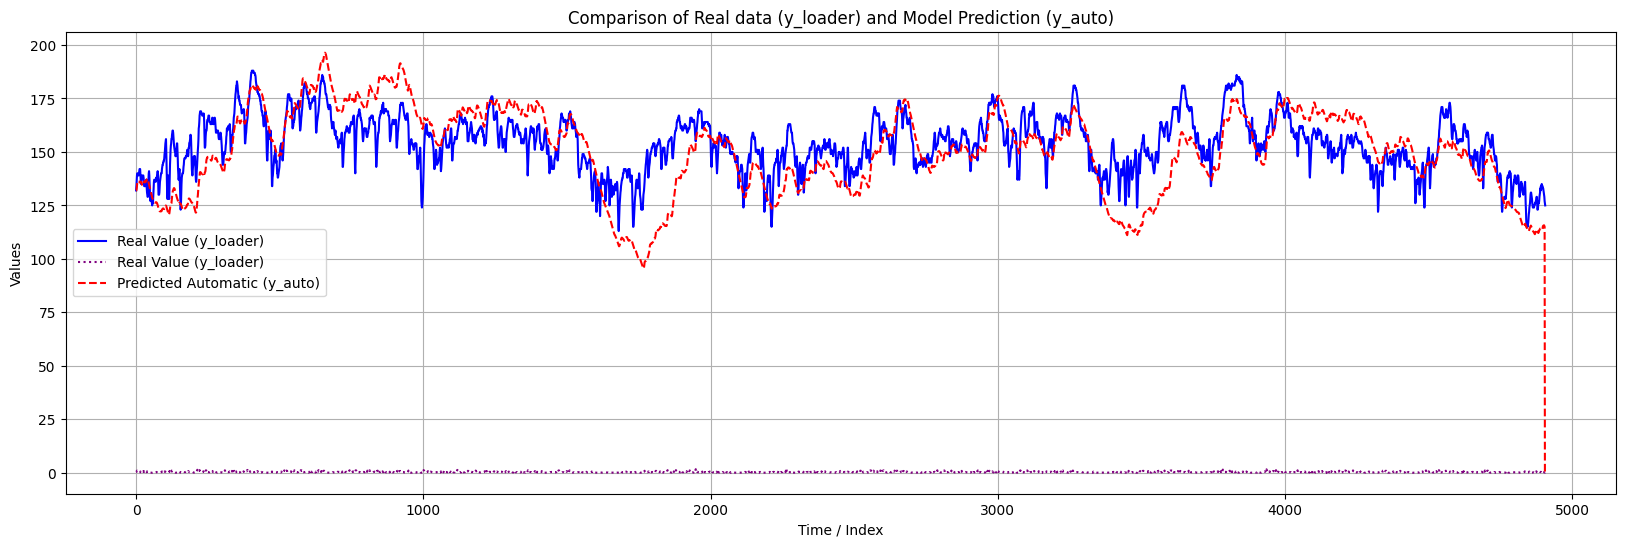

In [126]:
#Simulation best model structure
number_a=1
number_b=2
d=0

data = athlete_list[11]
# print the relative dataframe and check its columns
X_loader,y_loader = dataloader(data,number_a,number_b,d)
parameters = np.linalg.inv(X_loader.T.dot(X_loader)).dot(X_loader.T).dot(y_loader)
den = parameters[:number_a] #parameters a
num = parameters[number_a:] #parameters b

print("Den(a): ", den)
print("Num(b): ", num)
X_loader.head()

y = np.zeros(len(data))
y_auto = np.zeros(len(data))
y_auto[:max(number_a,number_b+d)] = data['y'][0]
print(y_auto)

#works for (0,1,0),(1,0,0)
for k in range(max(number_a,number_b +d), len(X_loader)):
  ##AUTOMATIC
  # Add the contribution from autoregressive terms (endogenous variables)
  for i_a in range(1, number_a + 1):
      y_auto[k] += den[i_a-1] * y_auto[k - i_a]  # Note: parameters_a starts at index 0
  # Add the contribution from exogenous input terms (with delay d)
  for j_b in range(number_b):
    #print("Input: ",'u-{}'.format(j_b+d))
    y_auto[k] += num[j_b] * X_loader['u-{}'.format(j_b+d)].iloc[k-j_b-d]



#Ploting
plt.figure(figsize=(20, 6))
X_axis = np.arange(0,4460)
print(X_axis)
# Plot the actual values (y_loader)
plt.plot(data['y'], label='Real Value (y_loader)', color='blue')
plt.plot(data['u'], label='Real Value (y_loader)', color='purple', linestyle=':')
# Plot the original data (y)    *AUTOMATIC
plt.plot(X_axis, y_auto, label='Predicted Automatic (y_auto)', color='red', linestyle='--')

# Add labels and title
plt.xlabel('Time / Index')
plt.ylabel('Values')
plt.title('Comparison of Real data (y_loader) and Model Prediction (y_auto)')
plt.legend()  # Add a legend
plt.grid(True) # Add grid lines for better readability
# Adjust the y-axis limits if necessary for better visualization
#plt.ylim([50, 200])
plt.show()

In [223]:
#Select one model and applie to all the datasets
number_a=1
number_b=2
d=0
one_4_all = pd.DataFrame(columns=['Athlete_Code', 'na', 'nb', 'd', 'AIC', 'Rsq','RMSE','BIC','FPE'])
model_count=0

for i in range(len(athlete_list)):
  data = athlete_list[i]
  print(f"Athlete: {code_name[i]}")
  print('\nModel #{} \nwith {} a parameters, {} b parameters and {} time delay'.format(model_count,number_a,number_b,d))
  #load the associated data using dataloader(data, na, nb, d)
  X_loader, y_loader = dataloader(data, number_a,  number_b, d)

  ##Calculate the a and b parameters
  # parameters vector [a0...an, b0...bm].T by the formula inv(X.T dot X) dot X.T dot y
  parameters = np.linalg.inv(X_loader.T.dot(X_loader)).dot(X_loader.T).dot(y_loader)
  parameters_a = parameters[:number_a]
  parameters_b = parameters[number_a:]


  ## Simulate values of Y
  ysim = np.zeros(len(y_loader)) # the plus one is because the first value is initialized and not simulated
  ysim[0]= y_loader.values[0] # initialize the first value
  max_lag= max(number_a,number_b+d-1)  # Maximum lag across both endogenous and exogenous variables

  for k in range(max_lag, len(X_loader)):
  # Add the contribution from autoregressive terms (endogenous variables)
    for i_a in range(1,number_a+1):
        #print("parameter a: ",i_a)
        ysim[k] += parameters_a[i_a-1] * ysim[k - i_a]  # Note: parameters_a starts at index 0

  # Add the contribution from exogenous input terms (with delay d)
    for j_b in range(number_b):
        #print("parameter b: ",j_b)
        ysim[k] += parameters_b[j_b] * X_loader['u-{}'.format(d+j_b)].iloc[k-j_b]  # Note: parameters_b starts at index 0
        #print('u-{}'.format(d+j_b),j_b,d)

  #Calculate SSG(K) and TC
  SSG = sum(parameters_b)/ (1 - sum(parameters_a))
  #Calculate the TC
  #Check if parameters_a has more than one element to avoid the error
  #if len(parameters_a) > 1:
  #    poles = 1/parameters_a[0]
  #else:
  #    poles = 1/parameters_a  # In case parameters_a has only one element
  poles = 1/parameters_a[0]
  print("parameters a", parameters_a, "Poles:", poles)

  #Check if poles is an array before calculating dominant_pole
  #if isinstance(poles, np.ndarray):
  #    dominant_pole = poles[np.argmin(np.abs(poles.imag))] #get the dominant
  #else:
  #   dominant_pole = poles  # If poles is a scalar, directly assign to dominant_pole
  dominant_pole = poles

  tau = -1 / np.log(dominant_pole)
  print("Time constant:", tau)




  ## Model evaluation for each generated model use r_squared and aic def above
  n = len(y_loader)
  SSR = np.sum((y_loader - ysim) ** 2)
  #Calculate usefull Model evaluation parameters
  r_squared = r_2(y_loader, ysim)
  aic =  2 * (na + nb) + len(y_loader) * np.log(1 - r_squared) # Evaluates the complexicity of the Model
  Rmse = rmse(y_loader, ysim[0:])  #Root Mean Squared Error (Less sensitive to outliers: It is less affected by extreme errors compared to RMSE)
  fpe = SSR * (n + k) / (n - k)                  #Final Prediction Error(used for model order selection)(Considers both model fit and complexity) (Asymptotically equivalent to AIC: For large sample sizes, FPE and AIC tend to select the same model)
  bic = n * np.log(SSR / n) + k * np.log(n)


  new_row = pd.DataFrame({'Athlete_Code': code_name[i],'SSG':[SSG],'Param_a':[parameters_a], 'Param_b':[parameters_b], 'na': [number_a], 'nb': [number_b], 'd': [d], 'AIC': [aic], 'Rsq': [r_squared],'RMSE':[Rmse], 'BIC':[bic],'FPE':[fpe]})

  one_4_all = pd.concat([one_4_all, new_row], ignore_index=True)





  print("its regression yield r squared: {}, Akaike's information criteria: {}".format(r_squared, aic))

  # Save relevant information to the empty lists
  #new_row = pd.DataFrame({'Athlete_Code': code_name[i],'Model_Index': [model_count], 'na': [na], 'nb': [nb], 'd': [d], 'AIC': [aic], 'Rsq': [r_squared],'RMSE':[Rmse], 'BIC':[bic],'FPE':[fpe]})
#results_df = pd.concat([results_df, new_row], ignore_index=True)
        # Update the model counter
  model_count += 1




Athlete: A1M1

Model #0 
with 1 a parameters, 2 b parameters and 0 time delay
parameters a [0.99647245] Poles: 1.0035400418764044
Time constant: -282.9822395986221
its regression yield r squared: -0.10534314162345004, Akaike's information criteria: 789.3062194134314
Athlete: A1M2

Model #1 
with 1 a parameters, 2 b parameters and 0 time delay
parameters a [0.99599311] Poles: 1.0040230128343903
Time constant: -249.06959078984784
its regression yield r squared: -0.06062515559749082, Akaike's information criteria: 276.39120953886294
Athlete: A2M1

Model #2 
with 1 a parameters, 2 b parameters and 0 time delay


<ipython-input-223-63fab3226668>:76: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  one_4_all = pd.concat([one_4_all, new_row], ignore_index=True)


parameters a [0.99539401] Poles: 1.004627304212285
Time constant: -216.60816447569235
its regression yield r squared: -0.06945743451549258, Akaike's information criteria: 533.819369215542
Athlete: A2M2

Model #3 
with 1 a parameters, 2 b parameters and 0 time delay
parameters a [0.99615558] Poles: 1.003859261512787
Time constant: -259.6166102420166
its regression yield r squared: -0.0957742983412786, Akaike's information criteria: 421.7341862920872
Athlete: A3M1

Model #4 
with 1 a parameters, 2 b parameters and 0 time delay
parameters a [0.99749537] Poles: 1.0025109205794203
Time constant: -398.7600976952992
its regression yield r squared: -0.27871196983747515, Akaike's information criteria: 1462.8134835459146
Athlete: A3M2

Model #5 
with 1 a parameters, 2 b parameters and 0 time delay
parameters a [0.99732612] Poles: 1.002681045841246
Time constant: -373.4885503696863
its regression yield r squared: -0.2312719616588983, Akaike's information criteria: 976.0127970422949
Athlete: A4M1


In [224]:
one_4_all

Athlete_Code na nb  d          AIC       Rsq       RMSE            BIC  \
0          A1M1  1  2  0   789.306219 -0.105343  23.410022  118123.463237   
1          A1M2  1  2  0   276.391210 -0.060625  19.398061   63887.227623   
2          A2M1  1  2  0   533.819369 -0.069457  15.717370  111955.469333   
3          A2M2  1  2  0   421.734186 -0.095774  16.533090   62462.367857   
4          A3M1  1  2  0  1462.813484 -0.278712  15.500073   83455.115016   
5          A3M2  1  2  0   976.012797 -0.231272  19.800467   66625.373078   
6          A4M1  1  2  0   511.280488 -0.075628  18.621562  100098.908468   
7          A4M2  1  2  0   487.458720 -0.101360  20.016236   71054.846174   
8          A5M1  1  2  0   522.557108 -0.077407  29.730860  106481.527921   
9          A5M2  1  2  0   287.354024 -0.057324  14.324275   67773.205937   
10         A6M1  1  2  0   630.813168 -0.094643  19.023888  100390.509875   
11         A6M2  1  2  0   281.589875 -0.056082  14.345969   67788.048858   

             FPE         SSG               Param_a  \
0   6.567494e+10  458.640295  [0.9964724458131383]   
1   1.495471e+10  424.877991  [0.9959931069477848]   
2   2.960437e+10  466.268215  [0.9953940091087676]   
3   1.086349e+10  480.067544  [0.9961555751281597]   
4   1.668528e+10  522.177935  [0.9974953683517293]   
5   1.676369e+10  525.648728  [0.9973261229457103]   
6   3.226462e+10  459.302523  [0.9959475461523475]   
7   1.926866e+10  457.261304  [0.9961195486157308]   
8   8.224494e+10  463.974327  [0.9975985907585336]   
9   9.868063e+09  390.294521  [0.9962961498535778]   
10  3.367385e+10  458.915032  [0.9939403975363832]   
11  9.897976e+09  456.081769   [0.995355700405981]   

                                       Param_b  
0   [-0.10068761756070888, 1.7185661115287016]  
1    [0.27163246323794643, 1.4308082071204897]  
2      [0.5215896451182896, 1.626037506771068]  
3     [0.6161771250728372, 1.2294064802168554]  
4    [0.06269040331430573, 1.2451729782967769]  
5    [0.41187437171465513, 0.9936456995816769]  
6      [0.5134819161692901, 1.347820361779572]  
7   [-0.01817115099572053, 1.7925514111425627]  
8   [-0.18794463551679316, 1.3021368724208178]  
9     [0.0829027237344988, 1.3626896950318472]  
10    [0.6621667128495317, 2.1186759453007213]  
11   [0.23154823544010394, 1.8866321371367185]

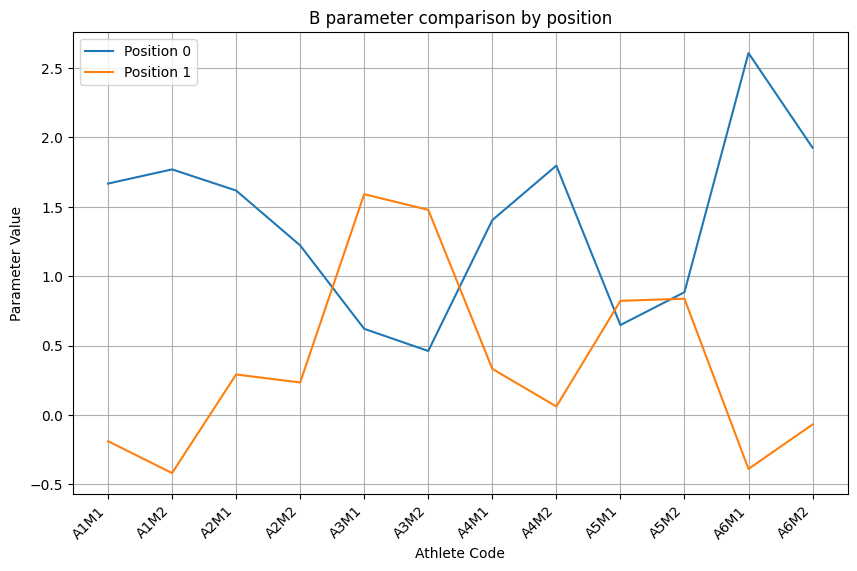

In [203]:
import matplotlib.pyplot as plt
import numpy as np

# Extract the 'b' parameter values and athlete codes
b_values = one_4_all['Param_b'].to_list()
athlete_codes = one_4_all['Athlete_Code'].to_list()

num_athletes = len(athlete_codes)
num_params = len(b_values[0])  # Assuming all athletes have the same number of 'b' parameters

# Create an array to store the parameter values for each position
param_positions = [[] for _ in range(num_params)]
for athlete_params in b_values:
    for i, param_value in enumerate(athlete_params):
        param_positions[i].append(param_value)

# Create the plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed

for i, position_values in enumerate(param_positions):
    plt.plot(athlete_codes, position_values, label=f"Position {i}")

# Customize the plot
plt.xlabel("Athlete Code")
plt.ylabel("Parameter Value")
plt.title("B parameter comparison by position")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

plt.show()

In [185]:
best_models_df

Athlete_Code  na  nb  d  Ranking  AIC_rank  Rsq_rank  BIC_rank       Rsq  \
0          A1M1   1   1  1      4.0       1.0       1.0       3.0 -0.102768   
1          A1M2   1   1  0      3.0       2.0       2.0       1.0 -0.064277   
2          A2M1   1   1  0      4.0       3.0       3.0       1.0 -0.083251   
3          A2M2   1   2  0      2.0       1.0       1.0       1.0 -0.095774   
4          A3M1   1   1  1      3.0       2.0       2.0       1.0 -0.282586   
5          A3M2   1   2  0      4.0       1.0       1.0       3.0 -0.231272   
6          A4M1   1   1  0      4.0       3.0       3.0       1.0 -0.095150   
7          A4M2   1   1  1      3.0       1.0       1.0       2.0 -0.100770   
8          A5M1   1   1  0      4.0       3.0       3.0       1.0 -0.078503   
9          A5M2   1   2  0      3.0       1.0       1.0       2.0 -0.057324   
10         A6M1   1   1  1      4.0       2.0       2.0       2.0 -0.105964   
11         A6M2   1   2  0      4.0       1.0       1.0       3.0 -0.056082   

            AIC            BIC           FPE  
0    761.251837  118139.917197  6.581469e+10  
1    281.777553   63196.473259  1.277032e+10  
2    623.104004  111536.232084  2.799517e+10  
3    413.734186   62462.367857  1.086349e+10  
4   1470.641858   83419.592367  1.658501e+10  
5    968.012797   66625.373078  1.676369e+10  
6    624.063066   99918.664532  3.136038e+10  
7    474.830815   70996.319530  1.904006e+10  
8    519.568212  105401.051039  7.004786e+10  
9    279.354024   67773.205937  9.868063e+09  
10   690.992139  100117.959458  3.235486e+10  
11   273.589875   67788.048858  9.897976e+09

In [ ]:
#2ºSystem Identification
def calcmodel(data, na, nb, d):
    # Load the associated data using dataloader(data, na, nb, d)
    X_loader, y_loader = dataloader(data, na, nb, d)


    # Estimate the a and b parameters vector [a0...an, b0...bm].T by the formula inv(X.T dot X) dot X.T dot y
    params = np.linalg.inv(X_loader.T @ X_loader) @ X_loader.T @ y_loader
    #params = np.linalg.solve(X_loader.T, X_loader) @ X_loader.T @ y_loader
    params = params.values


    parameters_a = params[:na]
    parameters_b = params[na:]


    # Optional: Calculate the predicted values of Y via Matrix-Vector multiplication (this is for prediction, not simulation)
    Y_pred = np.dot(X_loader, params)


    #Calculate a simulation using the predicted parameters use the following structure:
    ysim = np.zeros((len(X_loader)+1,1))  # the plus one is because the first value is initialized and not simulated

    ysim[0] = y_loader.values[0]    # initialize the first value
    max_lag = max(na, nb + d)  # Maximum lag across both endogenous and exogenous variables

    for k in range(max_lag, len(X_loader)):
        #Add the contribution from autoregressive terms (endogenous variables)
        for i_a in range(1, na + 1):
            #ysim[k] += parameters_a[i_a - 1] * ysim[k - i_a]
            ysim[k] += parameters_a[i_a - 1] * X_loader.iloc[k, i_a]

        #Add the contribution from exogenous input ter\ms (with delay d)
        for j_b in range(1, nb + 1):
            #ysim[k] += estimation[i_a - 1] * ysim[k - i_a - X_loader['u-{}'.format(d)]]                    #to get the column at delay u-d use this syntax X_loader['u-{}'.format(d)]
            ysim[k] += parameters_b[j_b-1] * X_loader['u-{}'.format(d)].iloc[k-j_b]


    # Calculate r-squared
    y_loader = y_loader.values.reshape(-1,1)
    SS_res = np.sum((y_loader - ysim[1:]) ** 2)  # Residual sum of squares
    SS_tot = np.sum((y_loader - np.mean(y_loader)) ** 2)  # Total sum of squares
    rsq = 1 - (SS_res / SS_tot)
    #print("ss_red:",SS_res,"ss_tot",SS_tot,"RSQ:",rsq)


    # Calculate AIC
    n = len(y_loader)  # Number of observations
    # Number of parameters (including intercept)
    aic =  2 * (na + nb) + len(y_loader) * np.log(1 - rsq) # Evaluates the complexicity of the Model


    return Y_pred, ysim, params, rsq, aic




print(calcmodel(data,0,1,0))
print(calcmodel(data,1,0,0))


In [ ]:
pds = pd.DataFrame(columns=["Athlete", "na", "nb", "d", "Params", "RSQ", "AIC"])

# Parameter ranges
na_max = nb_max = xdelay_max = 3

for i in range(len(athlete_list)):
    print(f"Athlete: {code_name[i]}")


In [ ]:
pds

In [ ]:
# Initialize an empty DataFrame to store results
pds = pd.DataFrame(columns=["Athlete", "na", "nb", "d", "Params", "RSQ", "AIC"])

# Parameter ranges
na_max = nb_max = xdelay_max = 3
# Iterate over each athlete
for i in range(len(athlete_list)):
    print(f"Athlete: {code_name[i]}")
    athlete = athlete_list[i]
    # Iterate over possible values of na, nb, and d
    for na in range(1,na_max+1):
      for nb in range(1,nb_max+1):
        for d in range(1,xdelay_max+1):
              # Calculate model with specified parameters
              Y_pred, ysim, params, rsq, aic = calcmodel(athlete, na=na, nb=nb, d=d)


              # Add the result as a new row to the DataFrame
              pds = pd.concat([pds, pd.DataFrame({
                  "Athlete": f"{code_name[i]}",
                  "na": [na],
                  "nb": [nb],
                  "d": [d],
                  "Params": [params],
                  "RSQ": [rsq],
                  "AIC": [aic]
              })], ignore_index=True)

# Display final DataFrame with all results
#print(pds)


#Logs
'''
Run   Time
1     24:23       #First version(5)
2     24:23          #Add to dataframe(5)
3     25:xx        #No Idea(5)
4     5:xx         #Normal(3)
'''

In [ ]:

A1M1 = pds[pds['Athlete'] == "A4M1"]
percentile_75_1 = A1M1['AIC'].quantile(0.9)
percentile_75_2 = np.percentile(A1M1['AIC'],90)
#print(percentile_75_1, percentile_75_2)
#A1M1 = A1M1[A1M1['RSQ'] >= percentile_75]
#print(A1M1)

percentile_95 = A1M1['RSQ'].quantile(0.75)
fig, ax1 = plt.subplots()
plt.figure(figsize=(10, 6))
ax1.plot(A1M1["RSQ"])
ax1.set_xlabel('Model')
ax1.set_ylabel('RSQ')
ax2 = ax1.twinx()
ax2.plot(A1M1["AIC"], color='red')
ax2.set_ylabel('AIC', color='red')
ax1.legend(['RSQ'], loc='upper left')
ax2.legend(['AIC'], loc='upper right')
plt.show()
#pds
#Logs
'''
Total: 1500 Models
'''
A1M1[['na', 'nb','d','RSQ','AIC']][0:]

In [ ]:
#3 Biological interpretation

# 2º Practical assignment

In [ ]:
uploaded = files.upload()

In [ ]:
# Mutant 334

M334_C1_In_df = pd.read_csv('Mutation334_C1_In.csv', names=['u'])
M334_C2_In_df = pd.read_csv('Mutation334_C2_In.csv', names=['u'])
M334_C3_In_df = pd.read_csv('Mutation334_C3_In.csv', names=['u'])
M334_C4_In_df = pd.read_csv('Mutation334_C4_In.csv', names=['u'])
M334_C5_In_df = pd.read_csv('Mutation334_C5_In.csv', names=['u'])
M334_C6_In_df = pd.read_csv('Mutation334_C6_In.csv', names=['u'])

M334_C1_Out_df = pd.read_csv('Mutation334_C1_Out.csv', names=['y'])
M334_C2_Out_df = pd.read_csv('Mutation334_C2_Out.csv', names=['y'])
M334_C3_Out_df = pd.read_csv('Mutation334_C3_Out.csv', names=['y'])
M334_C4_Out_df = pd.read_csv('Mutation334_C4_Out.csv', names=['y'])
M334_C5_Out_df = pd.read_csv('Mutation334_C5_Out.csv', names=['y'])
M334_C6_Out_df = pd.read_csv('Mutation334_C6_Out.csv', names=['y'])

Mutant_334_list = [M334_C1_In_df,
M334_C2_In_df,
M334_C3_In_df,
M334_C4_In_df,
M334_C5_In_df,
M334_C6_In_df,
M334_C1_Out_df,
M334_C2_Out_df,
M334_C3_Out_df,
M334_C4_Out_df,
M334_C5_Out_df,
M334_C6_Out_df]

# Mutant 343

M343_C1_In_df = pd.read_csv('Mutation343_C1_In.csv', names=['u'])
M343_C2_In_df = pd.read_csv('Mutation343_C2_In.csv', names=['u'])
M343_C3_In_df = pd.read_csv('Mutation343_C3_In.csv', names=['u'])
M343_C4_In_df = pd.read_csv('Mutation343_C4_In.csv', names=['u'])
M343_C5_In_df = pd.read_csv('Mutation343_C5_In.csv', names=['u'])
M343_C6_In_df = pd.read_csv('Mutation343_C6_In.csv', names=['u'])

M343_C1_Out_df = pd.read_csv('Mutation343_C1_Out.csv', names=['y'])
M343_C2_Out_df = pd.read_csv('Mutation343_C2_Out.csv', names=['y'])
M343_C3_Out_df = pd.read_csv('Mutation343_C3_Out.csv', names=['y'])
M343_C4_Out_df = pd.read_csv('Mutation343_C4_Out.csv', names=['y'])
M343_C5_Out_df = pd.read_csv('Mutation343_C5_Out.csv', names=['y'])
M343_C6_Out_df = pd.read_csv('Mutation343_C6_Out.csv', names=['y'])

Mutant_343_list = [M343_C1_In_df,
M343_C2_In_df,
M343_C3_In_df,
M343_C4_In_df,
M343_C5_In_df,
M343_C6_In_df,
M343_C1_Out_df,
M343_C2_Out_df,
M343_C3_Out_df,
M343_C4_Out_df,
M343_C5_Out_df,
M343_C6_Out_df]

# WildType

WildType_C1_In_df = pd.read_csv('WildType_C1_In.csv', names=['u'])
WildType_C2_In_df = pd.read_csv('WildType_C2_In.csv', names=['u'])
WildType_C3_In_df = pd.read_csv('WildType_C3_In.csv', names=['u'])
WildType_C4_In_df = pd.read_csv('WildType_C4_In.csv', names=['u'])
WildType_C5_In_df = pd.read_csv('WildType_C5_In.csv', names=['u'])
WildType_C6_In_df = pd.read_csv('WildType_C6_In.csv', names=['u'])

WildType_C1_Out_df = pd.read_csv('WildType_C1_Out.csv', names=['y'])
WildType_C2_Out_df = pd.read_csv('WildType_C2_Out.csv', names=['y'])
WildType_C3_Out_df = pd.read_csv('WildType_C3_Out.csv', names=['y'])
WildType_C4_Out_df = pd.read_csv('WildType_C4_Out.csv', names=['y'])
WildType_C5_Out_df = pd.read_csv('WildType_C5_Out.csv', names=['y'])
WildType_C6_Out_df = pd.read_csv('WildType_C6_Out.csv', names=['y'])

WildType_list = [WildType_C1_In_df,
WildType_C2_In_df,
WildType_C3_In_df,
WildType_C4_In_df,
WildType_C5_In_df,
WildType_C6_In_df,
WildType_C1_Out_df,
WildType_C2_Out_df,
WildType_C3_Out_df,
WildType_C4_Out_df,
WildType_C5_Out_df,
WildType_C6_Out_df]

# Unknown

Unknown_C1_In_df = pd.read_csv('Unknown_C1_In.csv', names=['u'])
Unknown_C2_In_df = pd.read_csv('Unknown_C2_In.csv', names=['u'])

Unknown_C1_Out_df = pd.read_csv('Unknown_C1_Out.csv', names=['y'])
Unknown_C2_Out_df = pd.read_csv('Unknown_C2_Out.csv', names=['y'])

UnknownType_list = [Unknown_C1_In_df,
Unknown_C2_In_df,
Unknown_C1_Out_df,
Unknown_C2_Out_df]


In [ ]:
def dataloader(data, na, nb, d):

    # Initialize empty arrays for lagged features
    u = data['u']
    X = pd.DataFrame()
    y = data['y']


    # Create lagged features for input ('b' parameters)
    for i in range(0,nb):
        X['u-{}'.format(i + d)] = u.shift(i + d)
    # Create lagged features for output ('a' parameters)
    for i in range(1,na+1):
        X['y-{}'.format(i)] = y.shift(i)


    X = X.iloc[max(na,nb+d):]
    # Set the target values
    y = y[max(na,nb+d):]

    X.reset_index(drop=True, inplace=True)
    y.reset_index(drop=True, inplace=True)
    return X, y